# Evaluate the corner only with the track coordinate

In [1]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd 

In [14]:
# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [15]:
type(circuit_info.corners)

pandas.core.frame.DataFrame

In [16]:
# Get X and Y coordinates
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

In [17]:
# Define distances along the track for interpolation
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
distances = np.insert(distances, 0, 0)  # Add 0 for the starting point

In [18]:
# Interpolate uniformly along the distances
uniform_distances = np.linspace(0, distances[-1], 500)  # Resample to 500 points
interp_x = interp1d(distances, x, kind='linear')
interp_y = interp1d(distances, y, kind='linear')
uniform_x = interp_x(uniform_distances)
uniform_y = interp_y(uniform_distances)

In [19]:
# Calculate angles between consecutive segments of the interpolated points
angles = []
for i in range(len(uniform_x) - 2):
    v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
    v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angles.append((angle + 180) % 360 - 180)

In [31]:
# Get median and IQR
abs_angles = np.abs(angles)
median_angle = np.median(abs_angles)
q1, q3 = np.percentile(abs_angles, [60, 75])
iqr = q3 - q1

In [32]:
max_val = 1
min_val = 0
# Normalize angles based on IQR, capped at the 25th and 75th percentiles
angle_intensities = [(angle - (median_angle - 0.5 * iqr)) / iqr for angle in abs_angles]
angle_intensities = np.clip(angle_intensities, min_val, max_val)  # Clamp between 0 and 1

In [33]:
angle_intensities

array([0.25885637, 0.01502354, 0.02568714, 0.08947558, 0.5070704 ,
       0.19897164, 0.09506818, 0.01831059, 0.03100656, 0.01502354,
       0.04704779, 0.05176155, 0.1379653 , 0.01928058, 0.01502354,
       0.57868106, 0.05851278, 0.08819064, 0.0918637 , 0.06177222,
       0.09301709, 0.13618263, 0.50342874, 0.03307334, 0.32720652,
       0.79564068, 0.46125617, 0.01502354, 0.63499376, 1.        ,
       0.7552336 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.01502354, 1.        , 1.        ,
       1.        , 0.26417546, 1.        , 1.        , 0.32930797,
       0.01502354, 0.01502354, 0.01502354, 0.01502354, 0.01502354,
       0.01502354, 0.01502354, 1.        , 1.        , 1.        ,
       1.        , 0.76780734, 1.        , 0.74513331, 0.15882823,
       1.        , 0.01502354, 0.14829345, 0.04986673, 0.36150175,
       0.51958139, 0.16847529, 0.02574506, 0.68187471, 0.37668734,
       1.        , 1.        , 1.        , 1.        , 1.     

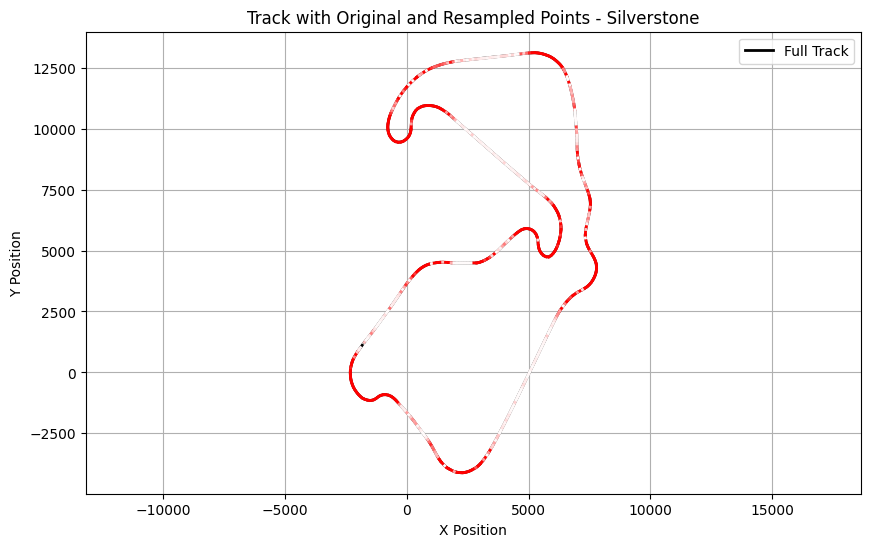

In [34]:
# Plot with new color intensities
plt.figure(figsize=(10, 6))
plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Full Track')

for i in range(len(angles)):
    intensity = angle_intensities[i]
    color = (1, 1 - intensity, 1 - intensity)
    plt.plot(uniform_x[i:i+2], uniform_y[i:i+2], color=color, linewidth=2)

plt.title('Track with Original and Resampled Points - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# strait line

req         WARNING 	DEFAULT CACHE ENABLED! (2.64 GB) /home/riccardo/.cache/fastf1
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


Number of straight sections: 10
Lengths of straight sections: [232.94394770889235, 349.4159319555157, 116.47197731850613, 116.47187275951217, 116.47191924748249, 232.94395463701224, 116.471977318507, 582.3598153358765, 582.3598836768806, 232.94395450286993]


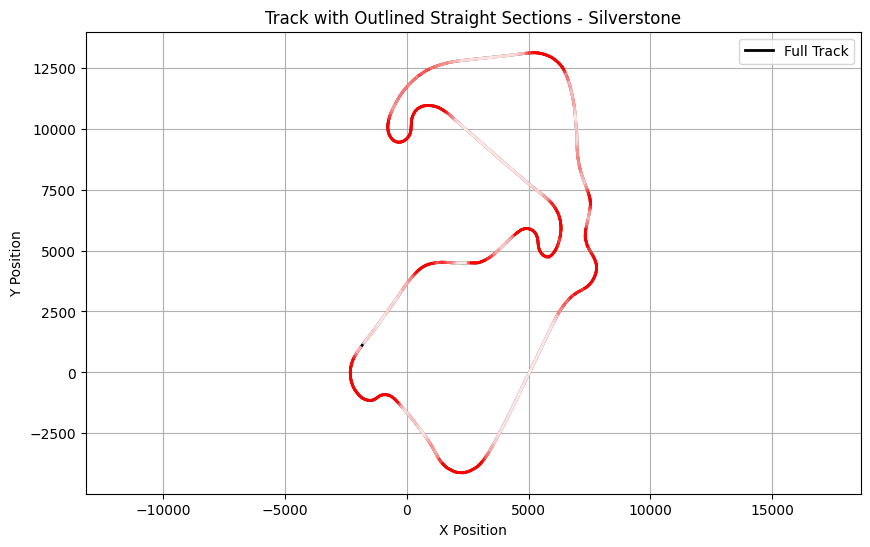

In [1]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get position data for the fastest lap
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get X and Y coordinates
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

# Define distances along the track for interpolation
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
distances = np.insert(distances, 0, 0)  # Add 0 for the starting point

# Interpolate uniformly along the distances
uniform_distances = np.linspace(0, distances[-1], 500)  # Resample to 500 points
interp_x = interp1d(distances, x, kind='linear')
interp_y = interp1d(distances, y, kind='linear')
uniform_x = interp_x(uniform_distances)
uniform_y = interp_y(uniform_distances)

# Calculate angles between consecutive segments of the interpolated points
angles = []
for i in range(len(uniform_x) - 2):
    v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
    v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angles.append((angle + 180) % 360 - 180)

# Get absolute angles
abs_angles = np.abs(angles)

# Smoothing the angle intensities with a moving average
window_size = 5  # Define the size of the moving average window
smoothed_angles = uniform_filter1d(abs_angles, size=window_size)

# Get median and IQR
median_angle = np.median(smoothed_angles)
q1, q3 = np.percentile(smoothed_angles, [25, 75])
iqr = q3 - q1

max_val = 1
min_val = 0

# Normalize angles based on IQR
angle_intensities = [(angle - (median_angle - 0.5 * iqr)) / iqr for angle in smoothed_angles]
angle_intensities = np.clip(angle_intensities, min_val, max_val)  # Clamp between 0 and 1

# Calculate lengths of straight sections
straight_segments = []
current_length = 0
straight_indices = []
straight_threshold = 20 # Define threshold for straight sections (in degrees)

for i in range(len(angle_intensities) - 1):
    segment_length = np.sqrt((uniform_x[i+1] - uniform_x[i])**2 + (uniform_y[i+1] - uniform_y[i])**2)
    
    if angle_intensities[i] < 0.1:  # Assuming straight segments are where intensity is low
        current_length += segment_length
        if current_length > 0 and i not in straight_indices:
            straight_indices.append(i)  # Store the index of the start of the straight segment
    else:
        if current_length > 0:
            straight_segments.append(current_length)
            current_length = 0

# Append the last straight segment if it ends with a straight
if current_length > 0:
    straight_segments.append(current_length)

# Number of straight sections and their lengths
num_straight_sections = len(straight_segments)
straight_lengths = straight_segments

# Print results
print(f'Number of straight sections: {num_straight_sections}')
print('Lengths of straight sections:', straight_lengths)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Full Track')

# Outline all straight sections
for start in range(len(straight_segments)):
    # Get the start index for the straight section
    start_idx = straight_indices[start]
    # Find the end index by searching until the next corner or end of the track
    end_idx = start_idx
    while end_idx < len(angle_intensities) - 1 and angle_intensities[end_idx] < 0.1:
        end_idx += 1
    plt.plot(uniform_x[start_idx:end_idx], uniform_y[start_idx:end_idx], 
             color='green', linewidth=2, linestyle='--')  # Dashed line for the outline

# Plot the original track segments with angle intensities
for i in range(len(angles)):
    intensity = angle_intensities[i]
    color = (1, 1 - intensity, 1 - intensity)
    plt.plot(uniform_x[i:i+2], uniform_y[i:i+2], color=color, linewidth=2)

plt.title('Track with Outlined Straight Sections - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '14', '63', '55', '18', '31', '44', '81', '10', '27', '24', '20', '77', '1', '22', '23', '21', '4', '2']


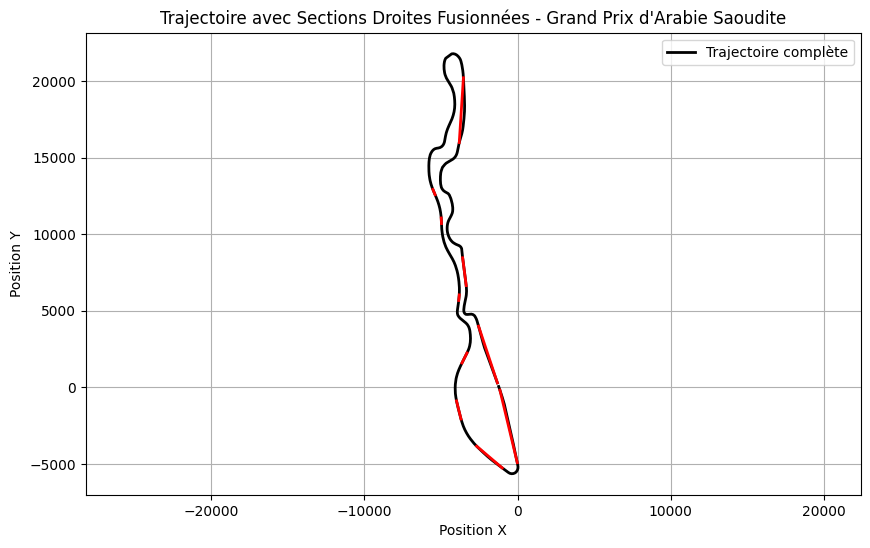

Section droite 1: Début (-1320.00, 296.00), Fin (-2549.22, 3995.34)
Section droite 2: Début (-3356.67, 6647.33), Fin (-3588.95, 8461.24)
Section droite 3: Début (-3810.02, 15985.04), Fin (-3537.96, 20214.23)
Section droite 4: Début (-5531.01, 12922.79), Fin (-5388.64, 12585.91)
Section droite 5: Début (-4987.86, 11061.74), Fin (-4971.48, 10696.42)
Section droite 6: Début (-3809.55, 6038.52), Fin (-3843.89, 5674.40)
Section droite 7: Début (-3304.70, 2248.76), Fin (-3632.52, 1594.85)
Section droite 8: Début (-3988.94, -882.35), Fin (-3695.99, -2065.60)
Section droite 9: Début (-2673.70, -3839.05), Fin (-1003.58, -5257.81)
Section droite 10: Début (-22.79, -4912.29), Fin (-1156.66, -172.56)


In [24]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d
import pandas as pd

# Fonction pour fusionner les sections droites trop proches les unes des autres
def merge_close_straights(straight_coords, threshold=10):
    merged_straights = []
    current_start = straight_coords[0][:2]  # (x_start, y_start) of the first section
    current_end = straight_coords[0][2:]    # (x_end, y_end) of the first section

    for i in range(1, len(straight_coords)):
        next_start = straight_coords[i][:2]
        distance = np.sqrt((next_start[0] - current_end[0]) ** 2 + (next_start[1] - current_end[1]) ** 2)
        
        if distance < threshold:
            # Extend the current straight section
            current_end = straight_coords[i][2:]  # Update end to the end of the current section
        else:
            # Save the current straight section and start a new one
            merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
            current_start = next_start
            current_end = straight_coords[i][2:]
    
    # Add the last section
    merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
    return merged_straights

# Charger les données de la piste du Grand Prix d'Arabie Saoudite
session = fastf1.get_session(2023, 'Saudi Arabian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Obtenir les coordonnées X et Y
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

# Définir les distances le long de la trajectoire pour interpolation
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
distances = np.insert(distances, 0, 0)  # Ajouter 0 pour le point de départ

# Interpolation uniforme le long des distances
uniform_distances = np.linspace(0, distances[-1], 500)  # Rééchantillonner à 500 points
interp_x = interp1d(distances, x, kind='linear')
interp_y = interp1d(distances, y, kind='linear')
uniform_x = interp_x(uniform_distances)
uniform_y = interp_y(uniform_distances)

# Calcul des angles entre segments consécutifs des points interpolés
angles = []
for i in range(len(uniform_x) - 2):
    v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
    v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angles.append((angle + 180) % 360 - 180)

# Lissage des angles
abs_angles = np.abs(angles)
window_size = 5
smoothed_angles = uniform_filter1d(abs_angles, size=window_size)

# Identifier les sections droites
threshold = 1  # Seuil d'angle pour considérer une section droite
straight_sections = []
start_idx = None

for i in range(len(smoothed_angles)):
    if smoothed_angles[i] < threshold:  # Si c'est une section droite
        if start_idx is None:
            start_idx = i  # Début d'une nouvelle section droite
    else:
        if start_idx is not None:
            straight_sections.append((start_idx, i))  # Fin de la section droite
            start_idx = None  # Réinitialiser l'indice de début

# Si la dernière section se termine à la fin des données
if start_idx is not None:
    straight_sections.append((start_idx, len(smoothed_angles)))

# Stocker les coordonnées des sections droites
straight_coordinates = []
for start_idx, end_idx in straight_sections:
    straight_coordinates.append((uniform_x[start_idx], uniform_y[start_idx],
                                 uniform_x[end_idx - 1], uniform_y[end_idx - 1]))

# Fusionner les sections droites trop proches
merged_straight_coordinates = merge_close_straights(straight_coordinates, threshold=1000)

# Tracer la piste et mettre en évidence les sections droites
plt.figure(figsize=(10, 6))
plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Trajectoire complète')

# Mettre en évidence les sections droites fusionnées
for (x_start, y_start, x_end, y_end) in merged_straight_coordinates:
    plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=2, linestyle='-')

plt.title('Trajectoire avec Sections Droites Fusionnées - Grand Prix d\'Arabie Saoudite')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# Imprimer les sections droites fusionnées avec leurs coordonnées
for idx, (x_start, y_start, x_end, y_end) in enumerate(merged_straight_coordinates):
    print(f"Section droite {idx + 1}: Début ({x_start:.2f}, {y_start:.2f}), Fin ({x_end:.2f}, {y_end:.2f})")


# fonction strait line 

In [ ]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d
import pandas as pd


# Fonction pour fusionner les sections droites trop proches les unes des autres
def merge_close_straights(straight_coords, threshold=10):
    merged_straights = []
    current_start = straight_coords[0][:2]  # (x_start, y_start) of the first section
    current_end = straight_coords[0][2:]    # (x_end, y_end) of the first section

    for i in range(1, len(straight_coords)):
        next_start = straight_coords[i][:2]
        distance = np.sqrt((next_start[0] - current_end[0]) ** 2 + (next_start[1] - current_end[1]) ** 2)
        
        if distance < threshold:
            # Extend the current straight section
            current_end = straight_coords[i][2:]  # Update end to the end of the current section
        else:
            # Save the current straight section and start a new one
            merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
            current_start = next_start
            current_end = straight_coords[i][2:]
    
    # Add the last section
    merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
    return merged_straights

# Fonction principale pour calculer et fusionner les sections droites
def calculate_and_merge_straights(gp_name, session_type='Q', angle_threshold=1, merge_threshold=1000, show_plot=False):
    # Charger les données de la piste
    session = fastf1.get_session(2023, gp_name, session_type)
    session.load()
    lap = session.laps.pick_fastest()
    pos = lap.get_pos_data()
    
    # Obtenir les coordonnées X et Y
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()
    
    # Définir les distances pour interpolation
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
    distances = np.insert(distances, 0, 0)

    # Interpolation uniforme
    uniform_distances = np.linspace(0, distances[-1], 500)
    interp_x = interp1d(distances, x, kind='linear')
    interp_y = interp1d(distances, y, kind='linear')
    uniform_x = interp_x(uniform_distances)
    uniform_y = interp_y(uniform_distances)
    
    # Calcul des angles entre segments
    angles = []
    for i in range(len(uniform_x) - 2):
        v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
        v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)
        angles.append((angle + 180) % 360 - 180)
    
    # Lissage des angles
    abs_angles = np.abs(angles)
    smoothed_angles = uniform_filter1d(abs_angles, size=5)
    
    # Identifier les sections droites
    straight_sections = []
    start_idx = None
    for i in range(len(smoothed_angles)):
        if smoothed_angles[i] < angle_threshold:
            if start_idx is None:
                start_idx = i
        else:
            if start_idx is not None:
                straight_sections.append((start_idx, i))
                start_idx = None
    if start_idx is not None:
        straight_sections.append((start_idx, len(smoothed_angles)))

    # Stocker les coordonnées des sections droites
    straight_coordinates = [
        (uniform_x[start_idx], uniform_y[start_idx], uniform_x[end_idx - 1], uniform_y[end_idx - 1])
        for start_idx, end_idx in straight_sections
    ]
    
    # Fusionner les sections droites trop proches
    merged_straight_coordinates = merge_close_straights(straight_coordinates, threshold=merge_threshold)

    # Calculer la longueur de chaque section droite et les stocker dans un DataFrame
    straight_lines = []
    for (x_start, y_start, x_end, y_end) in merged_straight_coordinates:
        length = np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
        straight_lines.append((x_start, y_start, x_end, y_end, length))
    
    df_straights = pd.DataFrame(straight_lines, columns=['Start_X', 'Start_Y', 'End_X', 'End_Y', 'Length'])

    # Affichage du graphique si demandé
    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Trajectoire complète')

        # Mettre en évidence les sections droites fusionnées
        for (x_start, y_start, x_end, y_end) in merged_straight_coordinates:
            plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=2, linestyle='-')
        
        plt.title(f'Trajectoire avec Sections Droites Fusionnées - {gp_name}')
        plt.xlabel('Position X')
        plt.ylabel('Position Y')
        plt.axis('equal')
        plt.grid()
        plt.legend()
        plt.show()

    # Afficher les données des sections droites fusionnées
    print(df_straights)
    
    return df_straights


In [ ]:
# Exemple d'appel pour le Grand Prix d'Arabie Saoudite
df_straights = calculate_and_merge_straights(
    gp_name='Saudi Arabian Grand Prix',
    session_type='Q',
    angle_threshold=1,
    merge_threshold=1000,
    show_plot=True  # Active l'affichage du graphique
)


# Afficher le DataFrame résultant
# print(df_straights)

In [ ]:
# Calculer les sections droites pour le Grand Prix d'Arabie Saoudite
df_straights = calculate_and_merge_straights('Saudi Arabian Grand Prix')

# Fonction pour faire la rotation des coordonnées
def rotate(coords, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(coords, rotation_matrix.T)


# Obtenir l'angle de rotation du circuit
session = fastf1.get_session(2023, 'Saudi Arabian Grand Prix', 'Q')
session.load()
track_angle = session.get_circuit_info().rotation * np.pi / 180

# Appliquer la rotation aux coordonnées des sections droites
for i, row in df_straights.iterrows():
    start_coords = rotate(np.array([[row['Start_X'], row['Start_Y']]]), track_angle)
    end_coords = rotate(np.array([[row['End_X'], row['End_Y']]]), track_angle)
    df_straights.at[i, 'Start_X'] = start_coords[0, 0]
    df_straights.at[i, 'Start_Y'] = start_coords[0, 1]
    df_straights.at[i, 'End_X'] = end_coords[0, 0]
    df_straights.at[i, 'End_Y'] = end_coords[0, 1]

# Charger le fichier des 50 sections pour le Grand Prix en question
# df_50_sections = pd.read_csv('/home/riccardo/Documents/F1/dataset.csv')
df_50_sections = pd.read_csv('/home/riccardo/Visual_Studio_Code/F1/dataset.csv')


df_50_sections = df_50_sections[df_50_sections['Grand Prix']== 'Saudi Arabian Grand Prix']

# Ajouter une colonne 'Straight_Line' pour indiquer les sections droites dans df_50_sections
df_50_sections['Straight_Line'] = None

print(df_straights)

for i in range(len(df_straights)):
    row = df_straights.loc[i]
    x_start, y_start = row['Start_X'], row['Start_Y']
    x_end, y_end = row['End_X'], row['End_Y']
    straight_length = row['Length']

    distances_start = np.sqrt((df_50_sections['X'] - x_start) ** 2 + (df_50_sections['Y'] - y_start) ** 2)
    closest_start = distances_start.idxmin()

    distances_end = np.sqrt((df_50_sections['X'] - df_50_sections['X'][closest_start]) ** 2 + 
                            (df_50_sections['Y'] - df_50_sections['Y'][closest_start]) ** 2)

    # Calculer les indices de début et de fin en fonction de l'offset initial
    start_idx = closest_start - df_50_sections.index[0]
    end_idx = closest_start + 7 + 1 - df_50_sections.index[0]

    # Utiliser .iloc pour accéder à search_range par position
    search_range = distances_end.iloc[start_idx:end_idx]
    closest_end = (search_range - straight_length).abs().idxmin()

    # Ajouter la condition pour ne pas affecter 'Straight_Line' si 'Angle' a une valeur
    for idx in range(closest_start, closest_end + 1):
        if pd.isna(df_50_sections.loc[idx, 'Angle']):  # Vérifie si 'Angle' est NaN
            df_50_sections.loc[idx, 'Straight_Line'] = straight_length

# Tracé de la trajectoire
plt.figure(figsize=(12, 6))
plt.plot(df_50_sections['X'], df_50_sections['Y'], marker='o', linestyle='-', color='blue', label="Trajectoire")

# Tracé des sections droites en rouge
straight_points = df_50_sections.dropna(subset=['Straight_Line'])
plt.scatter(straight_points['X'], straight_points['Y'], color='red', label="Sections droites", s=100)

# Personnalisation du plot
plt.title('Trajectoire avec Sections Droites en Rouge - Grand Prix d\'Arabie Saoudite')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

def calculate_straight_sections(df_50_sections, grand_prix_name, year=2023, session_type='Q', ignore_angles=True, plot=False):
    """
    Calcule et assigne les sections droites au DataFrame des sections du circuit.

    Paramètres:
    - df_50_sections (pd.DataFrame) : Le DataFrame des 50 sections de circuit
    - grand_prix_name (str) : Nom du Grand Prix (par ex. "Saudi Arabian Grand Prix")
    - year (int) : Année de la course (par défaut 2023)
    - session_type (str) : Type de session (par ex. 'Q' pour Qualification)
    - ignore_angles (bool) : Si True, n'assigne pas les sections droites aux lignes avec un angle
    - plot (bool) : Si True, affiche un graphique de la trajectoire et des sections droites

    Retour:
    - pd.DataFrame : Le DataFrame df_50_sections mis à jour avec les sections droites assignées
    """
    # Charger les données de la session pour obtenir l'angle de rotation du circuit
    session = fastf1.get_session(year, grand_prix_name, session_type)
    session.load()
    track_angle = session.get_circuit_info().rotation * np.pi / 180

    # Calculer et charger les sections droites
    df_straights = calculate_and_merge_straights(grand_prix_name)

    # Fonction de rotation
    def rotate(coords, angle):
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        return np.dot(coords, rotation_matrix.T)

    # Appliquer la rotation aux coordonnées des sections droites
    for i, row in df_straights.iterrows():
        start_coords = rotate(np.array([[row['Start_X'], row['Start_Y']]]), track_angle)
        end_coords = rotate(np.array([[row['End_X'], row['End_Y']]]), track_angle)
        df_straights.at[i, 'Start_X'] = start_coords[0, 0]
        df_straights.at[i, 'Start_Y'] = start_coords[0, 1]
        df_straights.at[i, 'End_X'] = end_coords[0, 0]
        df_straights.at[i, 'End_Y'] = end_coords[0, 1]

    # Filtrer le DataFrame des sections pour le Grand Prix en question
    df_50_sections = df_50_sections[df_50_sections['Grand Prix'] == grand_prix_name].copy()
    df_50_sections['Straight_Line'] = None

    # Assigner les sections droites à df_50_sections
    for i in range(len(df_straights)):
        row = df_straights.loc[i]
        x_start, y_start = row['Start_X'], row['Start_Y']
        x_end, y_end = row['End_X'], row['End_Y']
        straight_length = row['Length']

        distances_start = np.sqrt((df_50_sections['X'] - x_start) ** 2 + (df_50_sections['Y'] - y_start) ** 2)
        closest_start = distances_start.idxmin()

        distances_end = np.sqrt((df_50_sections['X'] - df_50_sections['X'][closest_start]) ** 2 + 
                                (df_50_sections['Y'] - df_50_sections['Y'][closest_start]) ** 2)

        # Calculer les indices de début et de fin en fonction de l'offset initial
        start_idx = closest_start - df_50_sections.index[0]
        end_idx = closest_start + 7 + 1 - df_50_sections.index[0]

        # Utiliser .iloc pour accéder à search_range par position
        search_range = distances_end.iloc[start_idx:end_idx]
        closest_end = (search_range - straight_length).abs().idxmin()

        # Ajouter la condition pour ignorer les sections droites si un angle est présent
        for idx in range(closest_start, closest_end + 1):
            if ignore_angles and not pd.isna(df_50_sections.loc[idx, 'Angle']):
                continue  # Ignore cette section droite si un angle est présent
            df_50_sections.loc[idx, 'Straight_Line'] = straight_length

    # Tracé de la trajectoire et des sections droites, si activé
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(df_50_sections['X'], df_50_sections['Y'], marker='o', linestyle='-', color='blue', label="Trajectoire")
        straight_points = df_50_sections.dropna(subset=['Straight_Line'])
        plt.scatter(straight_points['X'], straight_points['Y'], color='red', label="Sections droites", s=100)
        plt.title(f'Trajectoire avec Sections Droites en Rouge - {grand_prix_name}')
        plt.xlabel('Coordonnée X')
        plt.ylabel('Coordonnée Y')
        plt.axis('equal')
        plt.legend()
        plt.grid()
        plt.show()

    return df_50_sections

# Exemple d'appel de la fonction avec dataset en entrée et plot désactivé
df_50_sections_updated = calculate_straight_sections(df_50_sections, 'Saudi Arabian Grand Prix', ignore_angles=False, plot=True)
# print(df_50_sections_updated)

# Draw the corner on the track 

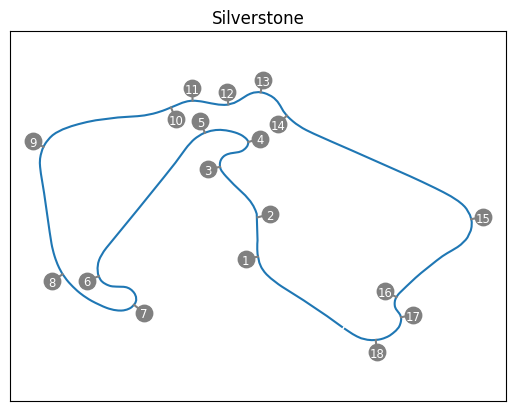

In [23]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()


# Choose point before and after the corner 

In [24]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get position data from the fastest lap
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get circuit information
circuit_info = session.get_circuit_info()

# Access the corners DataFrame
corner_df = circuit_info.corners[['X', 'Y', 'Number']]

# Choose a specific corner to analyze (for example, the first corner)
corner_index = 0  # Change this to the desired corner number
row = corner_df.iloc[corner_index]
corner_x = row['X']
corner_y = row['Y']

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [25]:

# Get the closest points in the position data for the corner
distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
nearest_indices = np.argsort(distances)[:6]  # Get the three closest points

# Select the corner points based on the nearest indices
corner_points = pos.iloc[nearest_indices]


In [26]:
print(corner_x,corner_y)

1192.50830078125 4503.826171875


In [27]:
# Calculate distances from the corner
distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)

In [28]:
# Get the index of the closest point to the corner
corner_index = np.argmin(distances)

In [29]:
# Determine the range for points before and after the corner
before_points = pos.iloc[max(corner_index - 3, 0):corner_index]  # First 10 points before the corner
after_points = pos.iloc[corner_index + 1:corner_index + 4]  # First 10 points after the corner

In [30]:
# Combine before and after points
corner_points = pd.concat([before_points, after_points])

# Optionally, you can print or visualize the selected points
print(corner_points)

                      Date   Status     X     Y     Z Source  \
18 2023-07-08 15:14:19.704  OnTrack   722  4362  2013    pos   
19 2023-07-08 15:14:19.804  OnTrack   781  4391  2013    pos   
20 2023-07-08 15:14:20.024  OnTrack   951  4456  2014    pos   
22 2023-07-08 15:14:20.684  OnTrack  1495  4520  2019    pos   
23 2023-07-08 15:14:20.944  OnTrack  1709  4511  2022    pos   
24 2023-07-08 15:14:21.105  OnTrack  1840  4497  2024    pos   

                     Time            SessionTime  
18 0 days 00:00:04.985000 0 days 01:29:19.701000  
19 0 days 00:00:05.085000 0 days 01:29:19.801000  
20 0 days 00:00:05.305000 0 days 01:29:20.021000  
22 0 days 00:00:05.965000 0 days 01:29:20.681000  
23 0 days 00:00:06.225000 0 days 01:29:20.941000  
24 0 days 00:00:06.386000 0 days 01:29:21.102000  


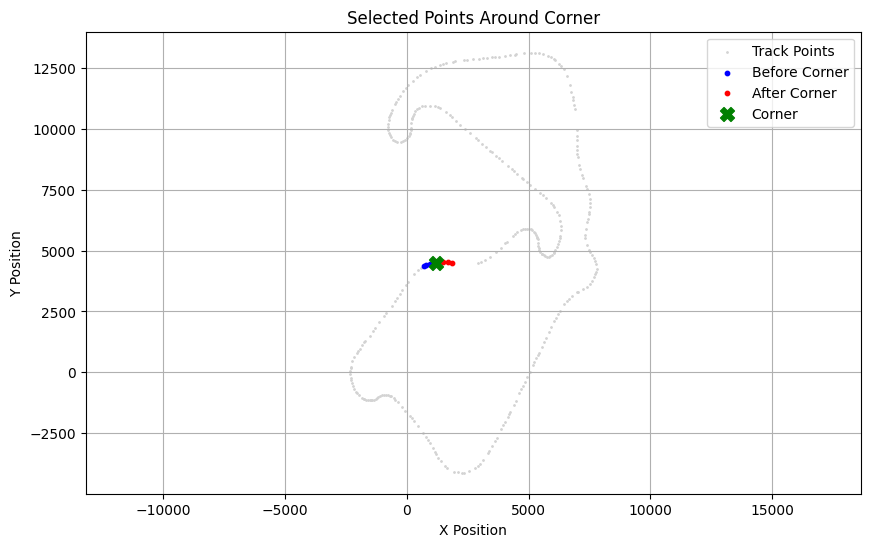

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')  # All track points
plt.scatter(before_points['X'], before_points['Y'], color='blue', label='Before Corner', s=10)
plt.scatter(after_points['X'], after_points['Y'], color='red', label='After Corner', s=10)

plt.scatter(corner_x, corner_y, color='green', label='Corner', s=100, marker='X')  # Corner point
plt.title('Selected Points Around Corner')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()


# Create regression with the coordinate before the corner and the coordinate after the corner and evaluate the angle between the two regression to categorize the corner V1

In [32]:
import numpy as np
import pandas as pd
import fastf1
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get position data from the fastest lap
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get circuit information
circuit_info = session.get_circuit_info()

# Access the corners DataFrame
corner_df = circuit_info.corners[['X', 'Y', 'Number']]

# Choose a specific corner to analyze (for example, the first corner)
corner_number = 0  # Change this to the desired corner number
row = corner_df.iloc[corner_number]
corner_x = row['X']
corner_y = row['Y']

# Get the index of the closest point to the corner
corner_index = np.argmin(distances)

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [33]:
# number of point used 
max_value = 10

# Determine the range for points before and after the corner
before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]  # First 10 points before the corner
after_points = pos.iloc[corner_index + 1:corner_index + max_value +1]  # First 10 points after the corner

# Specific point through which the line should pass
x0, y0 = corner_x, corner_y  

# Prepare data for linear regression (X needs to be a 2D array)
X_before = before_points['X'].values.reshape(-1, 1)
y_before = before_points['Y'].values

X_after = after_points['X'].values.reshape(-1, 1)
y_after = after_points['Y'].values

In [34]:
# Fit a linear regression model to the points before the corner
model_before = LinearRegression()
model_before.fit(X_before, y_before)

# Calculate the fitted line
fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

# Fit a linear regression model to the points after the corner
model_after = LinearRegression()
model_after.fit(X_after, y_after)

# Calculate the fitted line
fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

# Generate extended points for the fitted line
longer_line = 3000

# Extend the range of x_fit_before and x_fit_after further
x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max() + longer_line, 100).reshape(-1, 1)
y_fit_before = model_before.predict(x_fit_before)

x_fit_after = np.linspace(X_after.min() - longer_line, X_after.max() + longer_line, 100).reshape(-1, 1)
y_fit_after = model_after.predict(x_fit_after)

In [35]:
# Calculate the slopes of the two lines
slope_before = model_before.coef_[0]
slope_after = model_after.coef_[0]

# Calculate the acute angle between the two lines in radians
angle_radians = np.arctan(abs((slope_after - slope_before) / (1 + slope_before * slope_after)))

# Convert acute angle to degrees
acute_angle_degrees = np.degrees(angle_radians)

# Calculate the obtuse angle
obtuse_angle_degrees = 180 - acute_angle_degrees

print("The acute angle between the two lines is:", acute_angle_degrees, "degrees")
print("The obtuse angle between the two lines is:", obtuse_angle_degrees, "degrees")


The acute angle between the two lines is: 31.877976450578064 degrees
The obtuse angle between the two lines is: 148.12202354942193 degrees


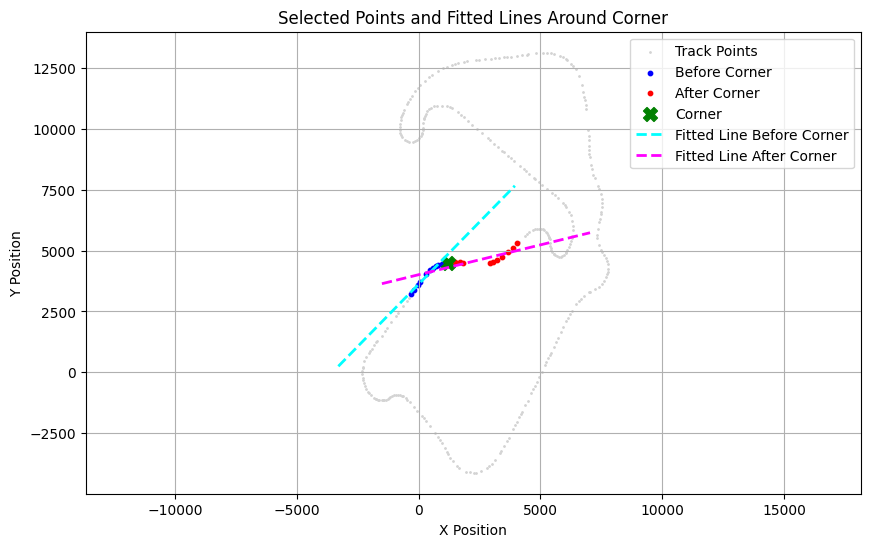

In [36]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')  # All track points
plt.scatter(before_points['X'], before_points['Y'], color='blue', label='Before Corner', s=10)
plt.scatter(after_points['X'], after_points['Y'], color='red', label='After Corner', s=10)

# Plot the corner point
plt.scatter(corner_x, corner_y, color='green', label='Corner', s=100, marker='X')  # Corner point

# Plot the fitted lines with new colors
plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner')
plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner')

plt.title('Selected Points and Fitted Lines Around Corner')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

# Create regression with the coordinate before the corner and the coordinate after the corner and evaluate the angle between the two regression to categorize the corner 2

In [77]:
import numpy as np
import pandas as pd
import fastf1
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get position data from the fastest lap
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get circuit information
circuit_info = session.get_circuit_info()

# Access the corners DataFrame
corner_df = circuit_info.corners[['X', 'Y', 'Number']]

# # Get X and Y coordinates
# x = pos['X'].to_numpy()
# y = pos['Y'].to_numpy()

# # Define distances along the track for interpolation


# Choose a specific corner to analyze (for example, the first corner)
corner_number = 5  # Change this to the desired corner number
row = corner_df.iloc[corner_number]
corner_x = row['X']
corner_y = row['Y']

# Get the index of the closest point to the corner
corner_index = np.argmin(distances)

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [78]:
# Parameters
max_value = 10
longer_line = 2000

# Determine the range for points before and after the corner
before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]  # First 10 points before the corner
after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]  # First 10 points after the corner

# Specific point through which the line should pass
x0, y0 = corner_x, corner_y

In [79]:
# Prepare data for linear regression (X needs to be a 2D array)
X_before = before_points['X'].values.reshape(-1, 1)
y_before = before_points['Y'].values

X_after = after_points['X'].values.reshape(-1, 1)
y_after = after_points['Y'].values

In [80]:
# Adjust X values for each segment to pass through (x0, y0)
adjusted_X_before = X_before - x0
adjusted_X_after = X_after - x0

In [81]:
# Fit a linear regression model to the points before the corner
model_before = LinearRegression()
model_before.fit(adjusted_X_before, y_before)
fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

# Fit a linear regression model to the points after the corner
model_after = LinearRegression()
model_after.fit(adjusted_X_after, y_after)
fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

In [82]:
# Extend the range of x_fit_before and x_fit_after further
x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)

# Calculate the fitted lines with the constraint
y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

In [83]:
# Calculate the slopes of the two lines
slope_before = model_before.coef_[0]
slope_after = model_after.coef_[0]

In [ ]:
# Calculate the acute angle between the two lines in radians
angle_radians = np.arctan(abs((slope_after - slope_before) / (1 + slope_before * slope_after)))

# Convert acute angle to degrees
acute_angle_degrees = np.degrees(angle_radians)

# Calculate the obtuse angle
obtuse_angle_degrees = 180 - acute_angle_degrees

The acute angle between the two lines is: 58.61079477114499 degrees
The obtuse angle between the two lines is: 121.38920522885502 degrees


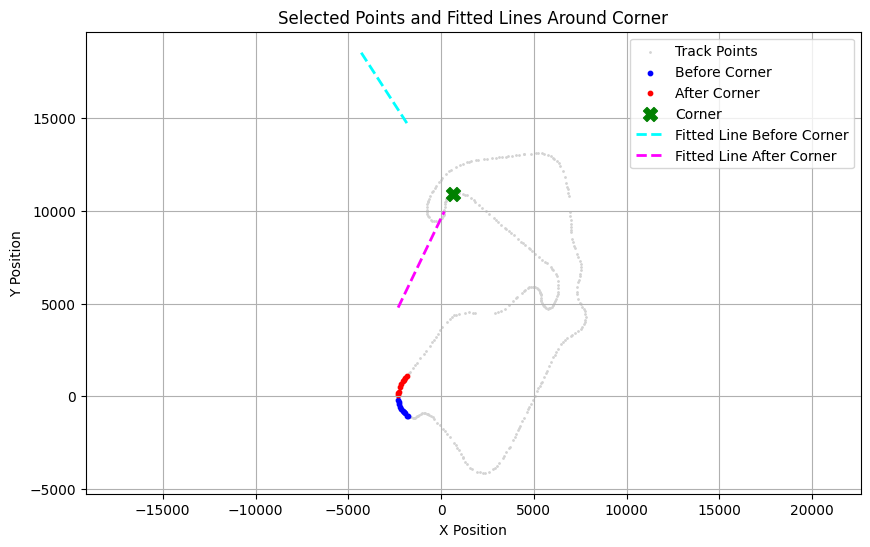

In [85]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')  # All track points
plt.scatter(before_points['X'], before_points['Y'], color='blue', label='Before Corner', s=10)
plt.scatter(after_points['X'], after_points['Y'], color='red', label='After Corner', s=10)

# Plot the corner point
plt.scatter(corner_x, corner_y, color='green', label='Corner', s=100, marker='X')  # Corner point

print("The acute angle between the two lines is:", acute_angle_degrees, "degrees")
print("The obtuse angle between the two lines is:", obtuse_angle_degrees, "degrees")

# Plot the fitted lines with new colors
plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner')
plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner')

plt.title('Selected Points and Fitted Lines Around Corner')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

# Constrained Linear Regression Before and After Corner test

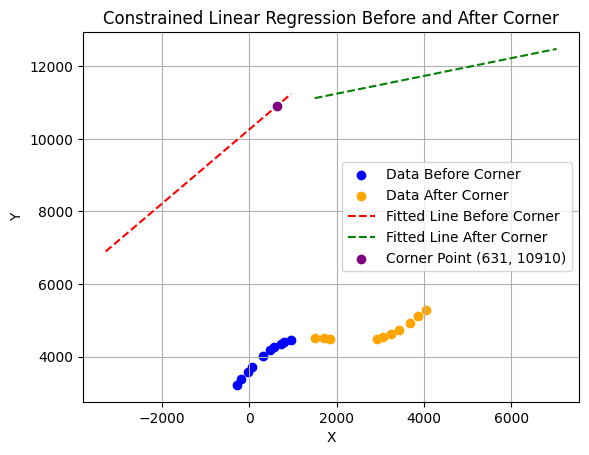

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_value = 10
longer_line = 3000

# Determine the range for points before and after the corner
before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]  # First 10 points before the corner
after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]  # First 10 points after the corner

# Specific point through which the line should pass
x0, y0 = corner_x, corner_y

# Prepare data for linear regression (X needs to be a 2D array)
X_before = before_points['X'].values.reshape(-1, 1)
y_before = before_points['Y'].values

X_after = after_points['X'].values.reshape(-1, 1)
y_after = after_points['Y'].values

# Adjust X values for each segment to pass through (x0, y0)
adjusted_X_before = X_before - x0
adjusted_X_after = X_after - x0

# Fit a linear regression model to the points before the corner
model_before = LinearRegression()
model_before.fit(adjusted_X_before, y_before)
fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

# Fit a linear regression model to the points after the corner
model_after = LinearRegression()
model_after.fit(adjusted_X_after, y_after)
fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

# Extend the range of x_fit_before and x_fit_after further
x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)

# Calculate the fitted lines with the constraint
y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

# Plot the data points and the constrained regression lines
plt.scatter(X_before, y_before, color='blue', label='Data Before Corner')
plt.scatter(X_after, y_after, color='orange', label='Data After Corner')
plt.plot(x_fit_before, y_fit_before, color='red', linestyle='--', label='Fitted Line Before Corner')
plt.plot(x_fit_after, y_fit_after, color='green', linestyle='--', label='Fitted Line After Corner')
plt.scatter(x0, y0, color='purple', label=f'Corner Point ({round(x0)}, {round(y0)})', zorder=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Constrained Linear Regression Before and After Corner")
plt.grid(True)
plt.show()


# interpolate data to have equal step 

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


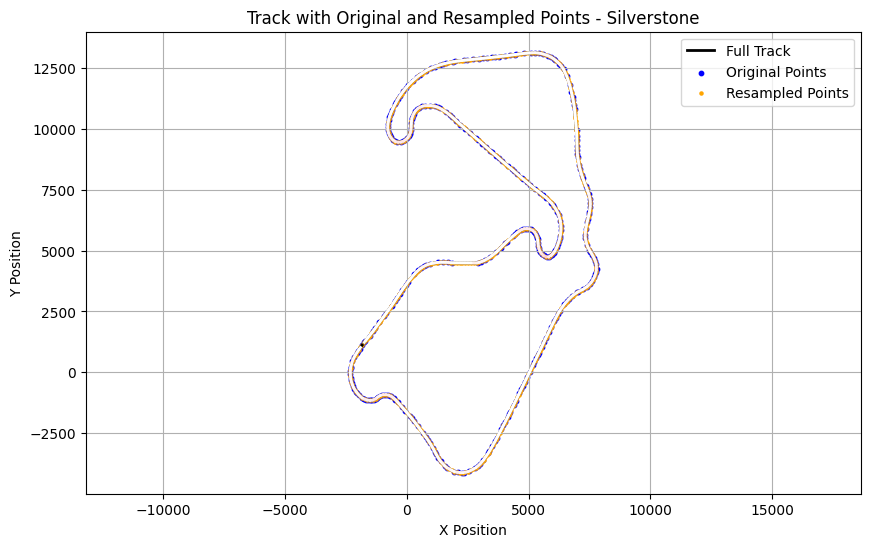

In [47]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get X and Y coordinates
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

# Define distances along the track for interpolation
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
distances = np.insert(distances, 0, 0)  # Add 0 for the starting point

# Number of resample point 
nb_point = 500


# Interpolate uniformly along the distances
uniform_distances = np.linspace(0, distances[-1], nb_point)  # Resample to 500 points
interp_x = interp1d(distances, x, kind='linear')
interp_y = interp1d(distances, y, kind='linear')
uniform_x = interp_x(uniform_distances)
uniform_y = interp_y(uniform_distances)

# Calculate angles between consecutive segments of the interpolated points
angles = []
for i in range(len(uniform_x) - 2):
    v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
    v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angles.append((angle + 180) % 360 - 180)

# Plot the full track in a neutral color
plt.figure(figsize=(10, 6))

plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Full Track')

# Color the track based on angles
for i in range(len(angles)):
    angle_intensity = abs(angles[i]) / 180  # Normalize for color intensity
    color = (1, 1 - angle_intensity, 1 - angle_intensity)  # Red intensity based on angle
    plt.plot(uniform_x[i:i+2], uniform_y[i:i+2], color=color, linewidth=2)

# Mark original and resampled points
plt.scatter(x, y, color='blue', s=10, label='Original Points')  # Original data points
plt.scatter(uniform_x, uniform_y, color='orange', s=5, label='Resampled Points')  # Resampled points

plt.title('Track with Original and Resampled Points - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


# Graph of all the corner

/tmp/ipykernel_68381/2794928285.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')


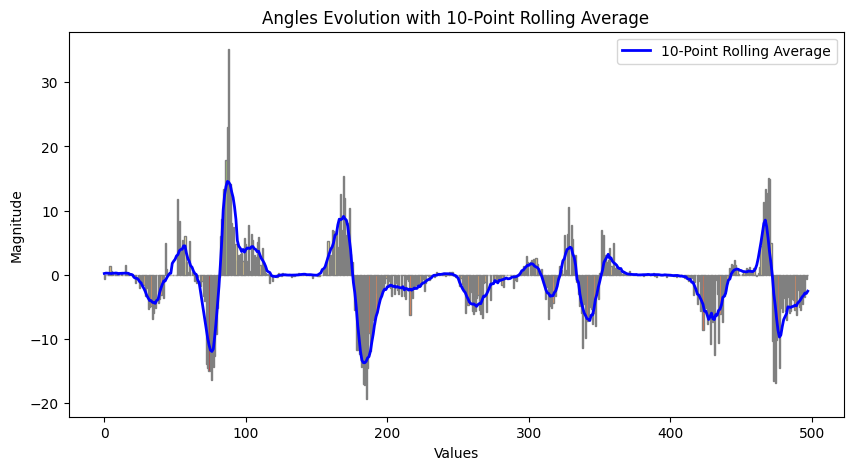

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# Sample list of values
values = angles

# Normalize the values to the range [0, 1]
min_val = min(values)
max_val = max(values)
normalized_values = [(value - min_val) / (max_val - min_val) for value in values]

# Create a colormap (e.g., 'viridis', 'plasma', 'RdYlGn', etc.)
cmap = cm.get_cmap('RdYlGn')

# Map normalized values to colors
colors = [cmap(norm_val) for norm_val in normalized_values]

rolling_avg_step = 10

# Calculate the rolling average over 5 points
rolling_avg = pd.Series(values).rolling(window=rolling_avg_step,center=True, min_periods=1).mean()

# Plotting the values with the corresponding colors
plt.figure(figsize=(10, 5))
for i, value in enumerate(values):
    plt.bar(i, value, color=colors[i], edgecolor='grey')

# Plot the rolling average line
plt.plot(rolling_avg, color='blue', linewidth=2, label=f'{rolling_avg_step}-Point Rolling Average')

# Adding titles and labels
plt.title(f'Angles Evolution with {rolling_avg_step}-Point Rolling Average')
plt.xlabel('Values')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


# exemple of use of linecollection 

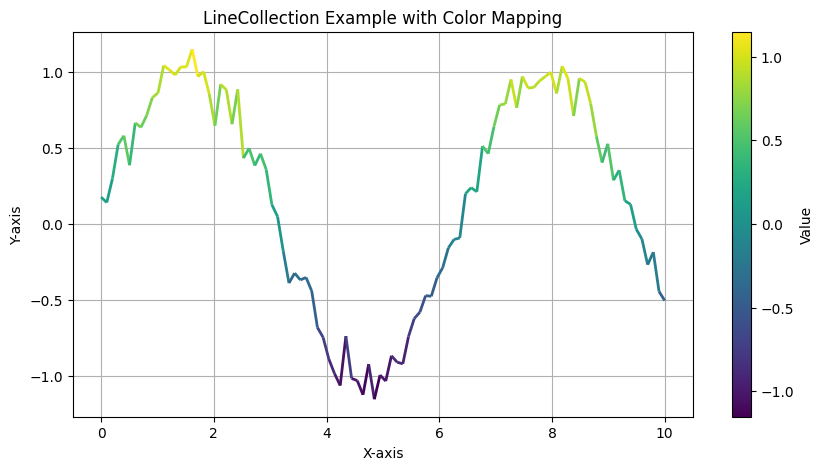

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Generate some example data
np.random.seed(0)  # For reproducibility
n_lines = 100
x = np.linspace(0, 10, n_lines)
y = np.sin(x) + np.random.normal(scale=0.1, size=n_lines)  # Noisy sine wave

# Create segments for LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)  # Reshape for LineCollection
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Create pairs of points

# Normalize values for color mapping
norm = plt.Normalize(y.min(), y.max())
colors = plt.cm.viridis(norm(y))  # Map values to colors

# Create a LineCollection
line_collection = LineCollection(segments, cmap='viridis', norm=norm, linewidths=2)
line_collection.set_array(y)  # Use y values for color mapping

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.add_collection(line_collection)  # Add LineCollection to the axes
ax.autoscale_view()  # Automatically scale axes to fit the data

# Add colorbar
cb = plt.colorbar(line_collection, ax=ax)
cb.set_label('Value')

# Set labels and title
plt.title('LineCollection Example with Color Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


# angle for all corner 

In [50]:
import numpy as np
import pandas as pd
import fastf1
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get position data from the fastest lap
pos = lap.get_pos_data()

# Get circuit information
circuit_info = session.get_circuit_info()

# Access the corners DataFrame
corner_df = circuit_info.corners[['X', 'Y', 'Number']]



core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


Corner 1: Acute Angle = 31.88°, Obtuse Angle = 148.12°


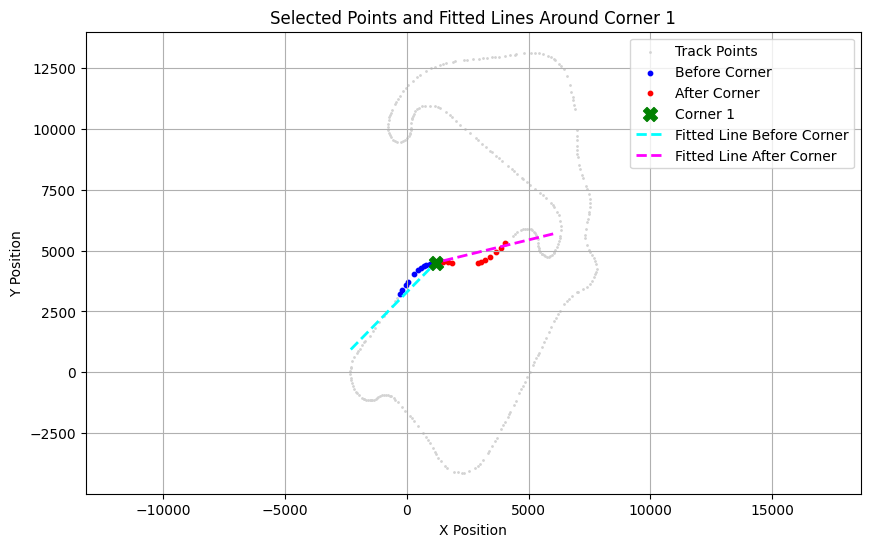

Corner 2: Acute Angle = 25.15°, Obtuse Angle = 154.85°


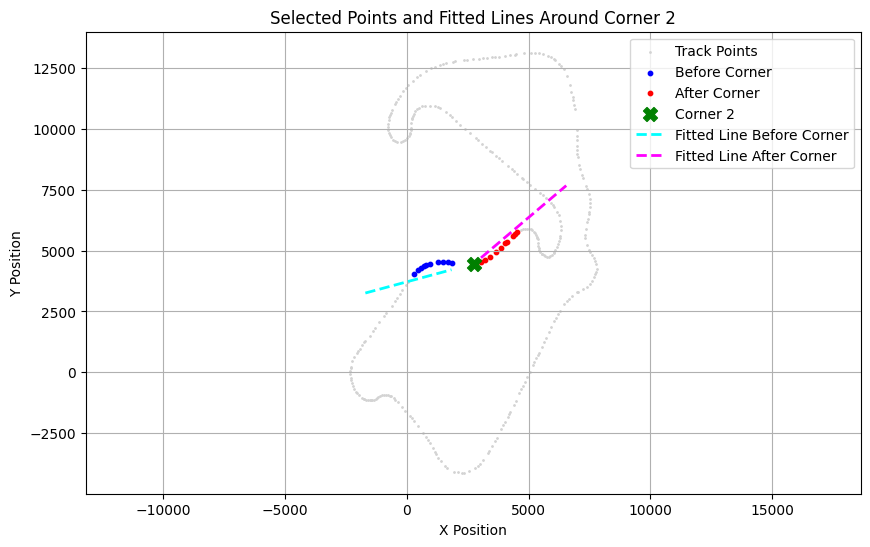

Corner 3: Acute Angle = 86.39°, Obtuse Angle = 93.61°


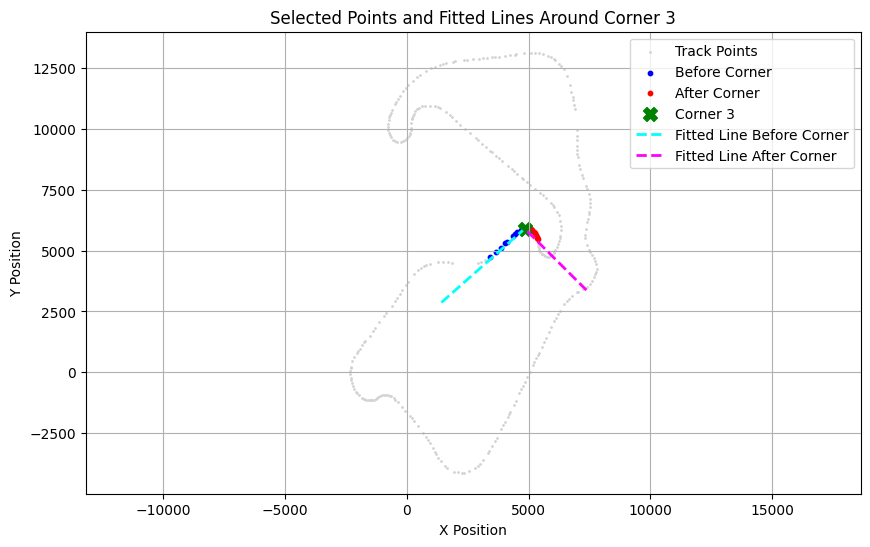

Corner 4: Acute Angle = 55.50°, Obtuse Angle = 124.50°


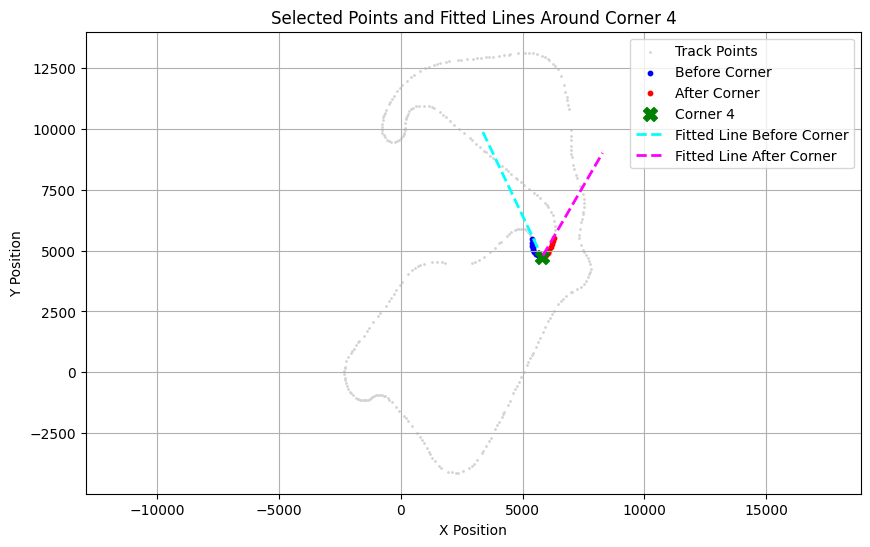

Corner 5: Acute Angle = 61.84°, Obtuse Angle = 118.16°


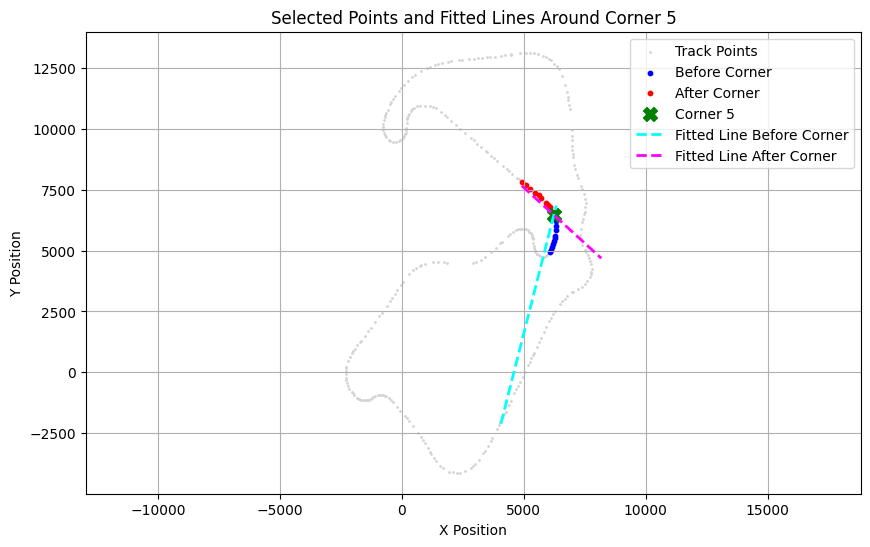

Corner 6: Acute Angle = 82.67°, Obtuse Angle = 97.33°


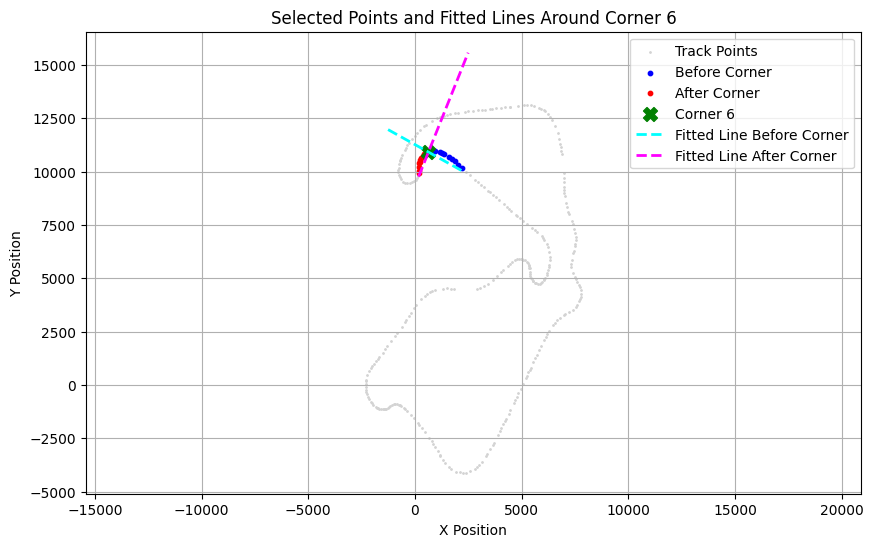

Corner 7: Acute Angle = 27.12°, Obtuse Angle = 152.88°


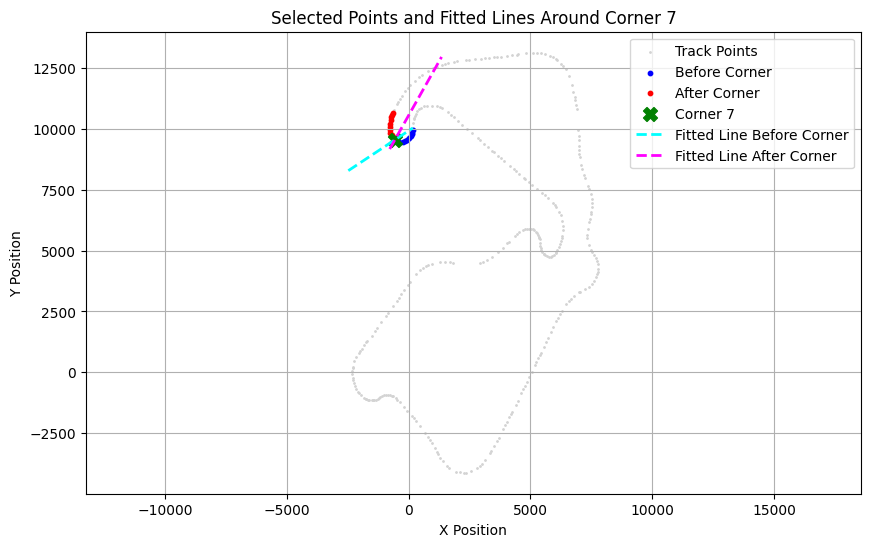

Corner 8: Acute Angle = 38.52°, Obtuse Angle = 141.48°


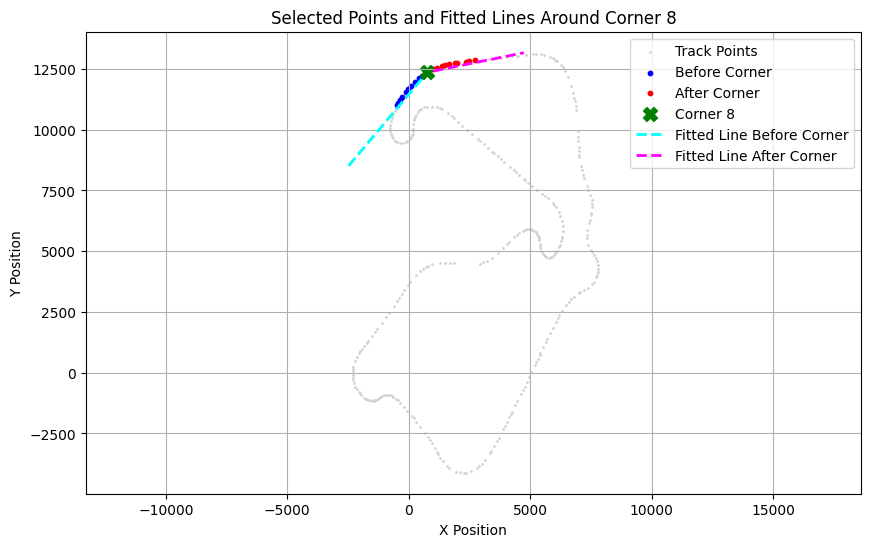

Corner 9: Acute Angle = 66.60°, Obtuse Angle = 113.40°


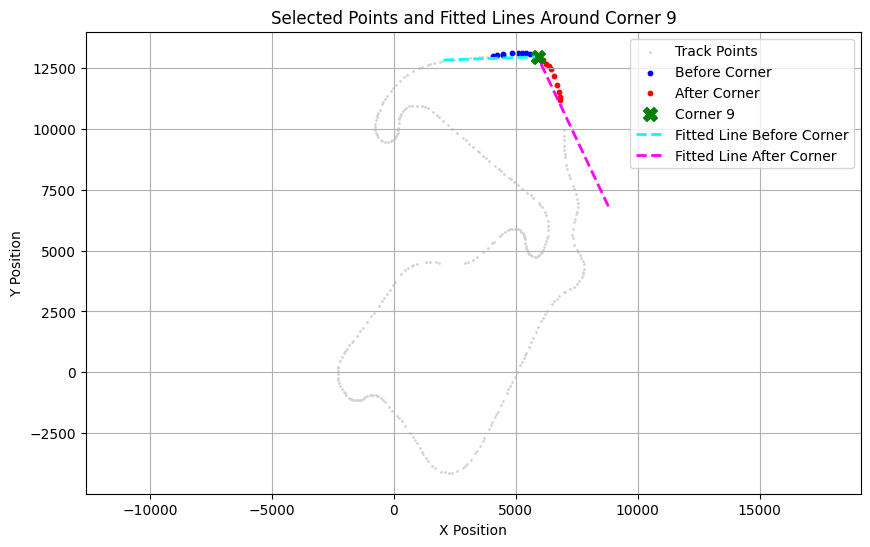

Corner 10: Acute Angle = 25.86°, Obtuse Angle = 154.14°


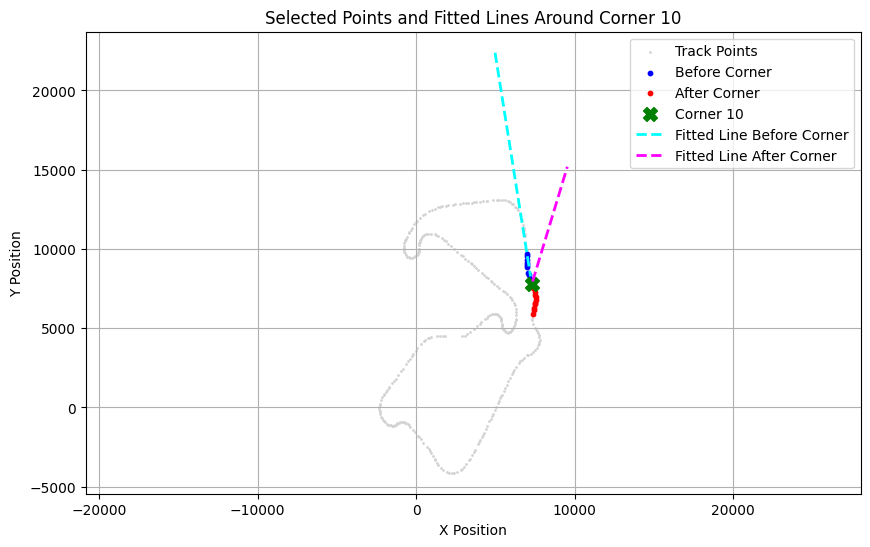

Corner 11: Acute Angle = 30.45°, Obtuse Angle = 149.55°


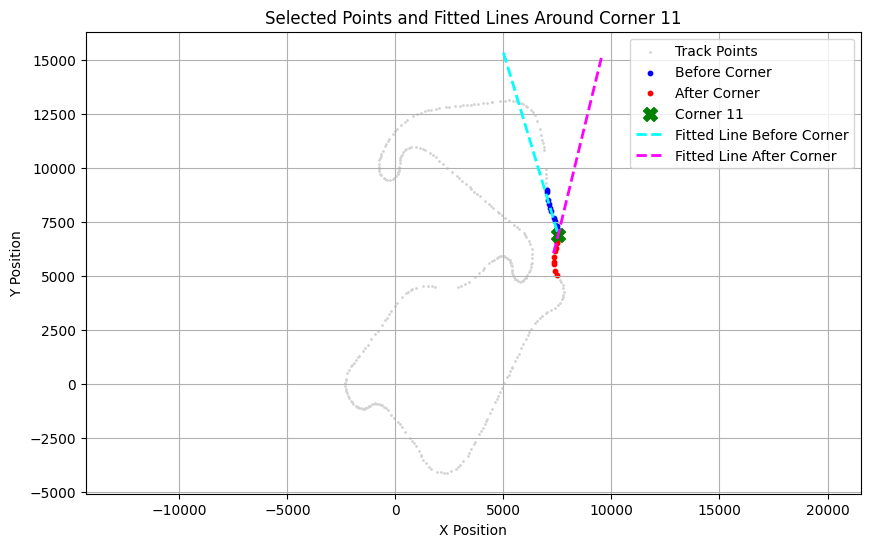

Corner 12: Acute Angle = 29.96°, Obtuse Angle = 150.04°


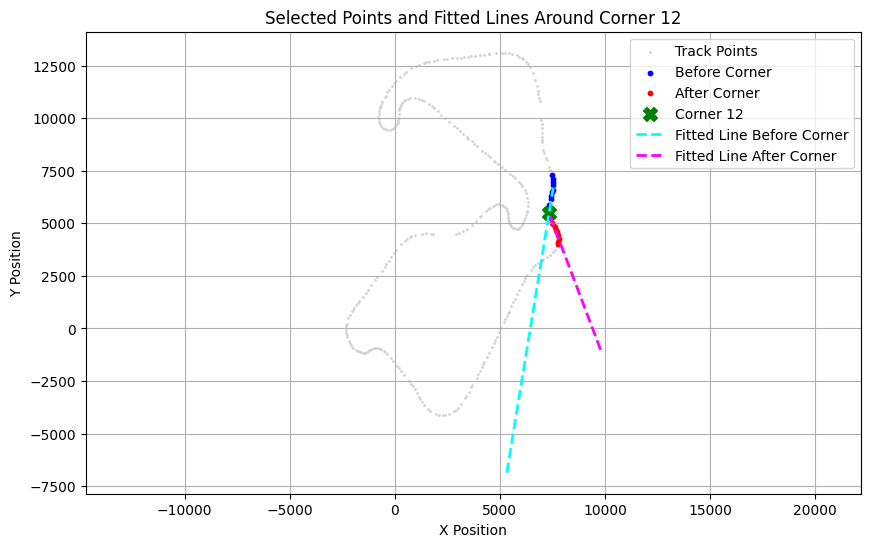

Corner 13: Acute Angle = 71.85°, Obtuse Angle = 108.15°


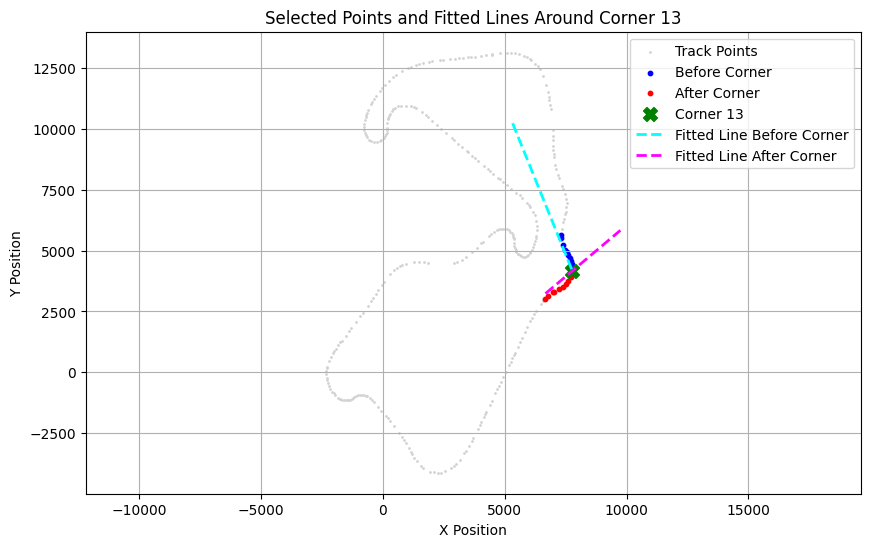

Corner 14: Acute Angle = 11.84°, Obtuse Angle = 168.16°


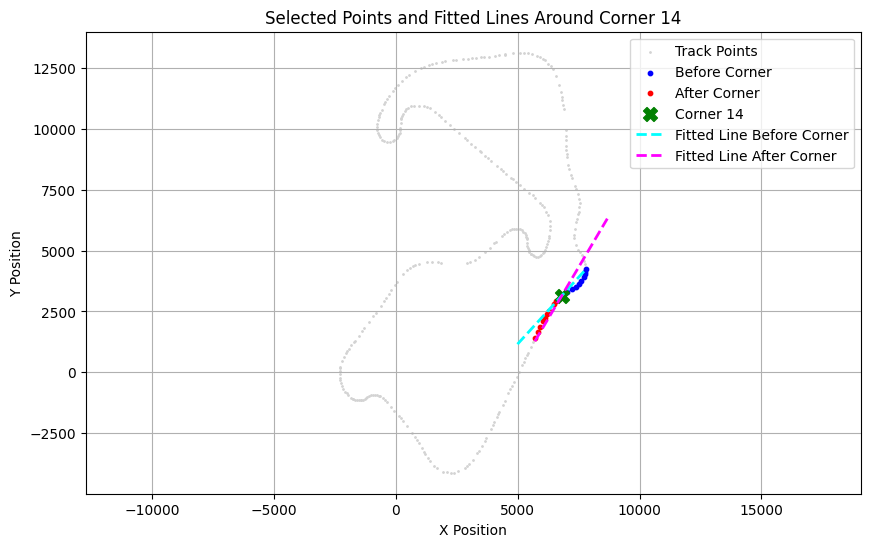

Corner 15: Acute Angle = 88.03°, Obtuse Angle = 91.97°


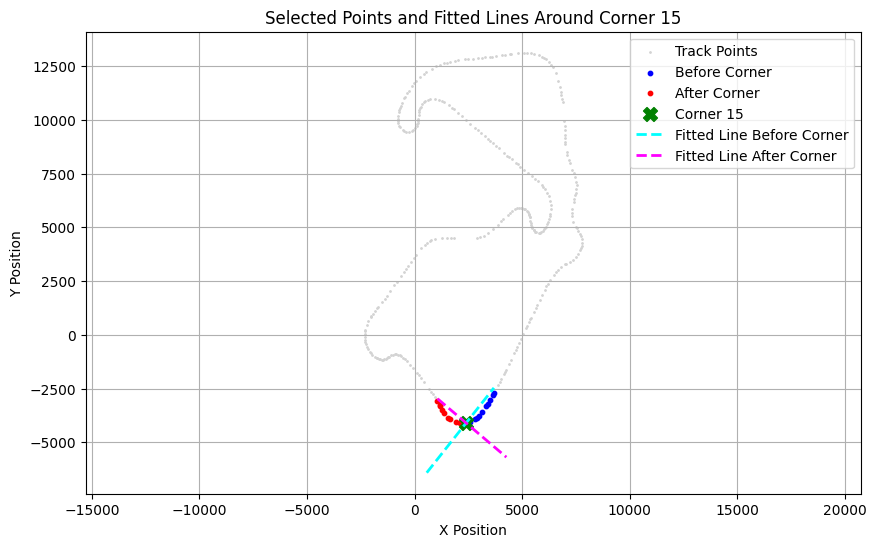

Corner 16: Acute Angle = 65.06°, Obtuse Angle = 114.94°


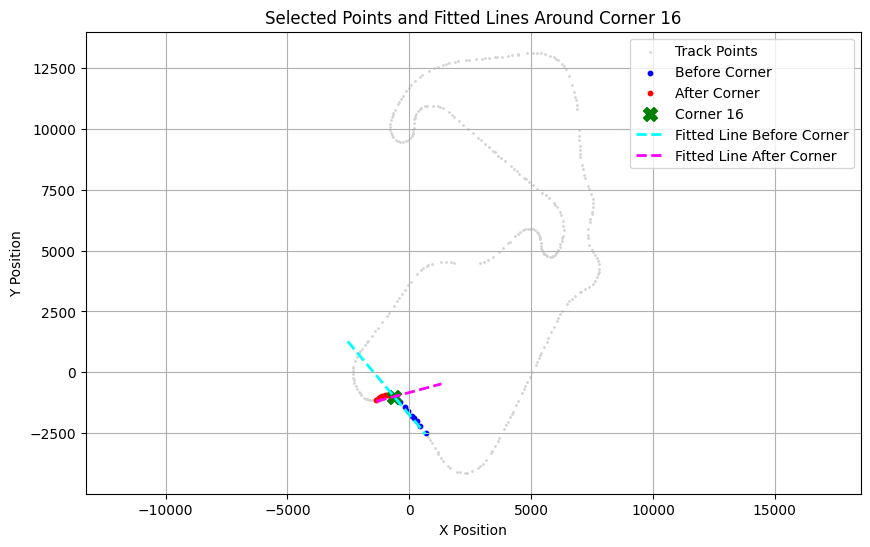

Corner 17: Acute Angle = 57.89°, Obtuse Angle = 122.11°


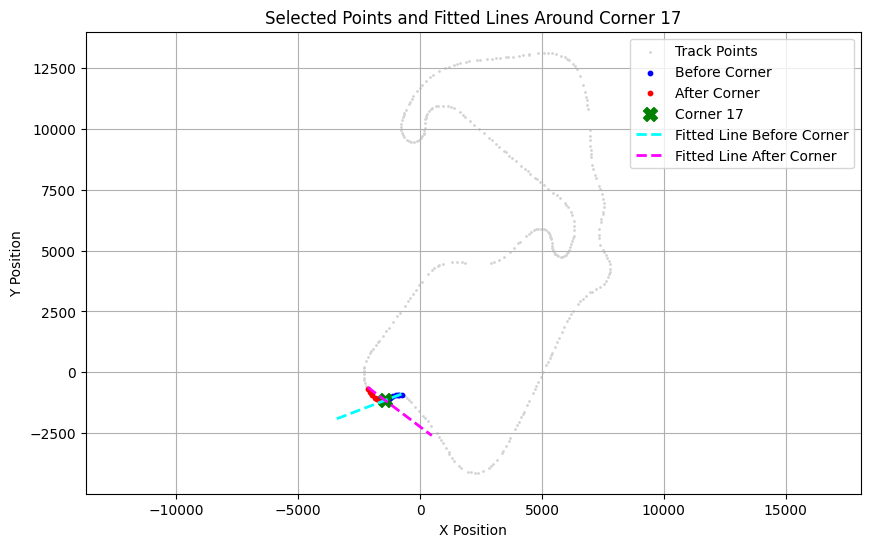

Corner 18: Acute Angle = 58.61°, Obtuse Angle = 121.39°


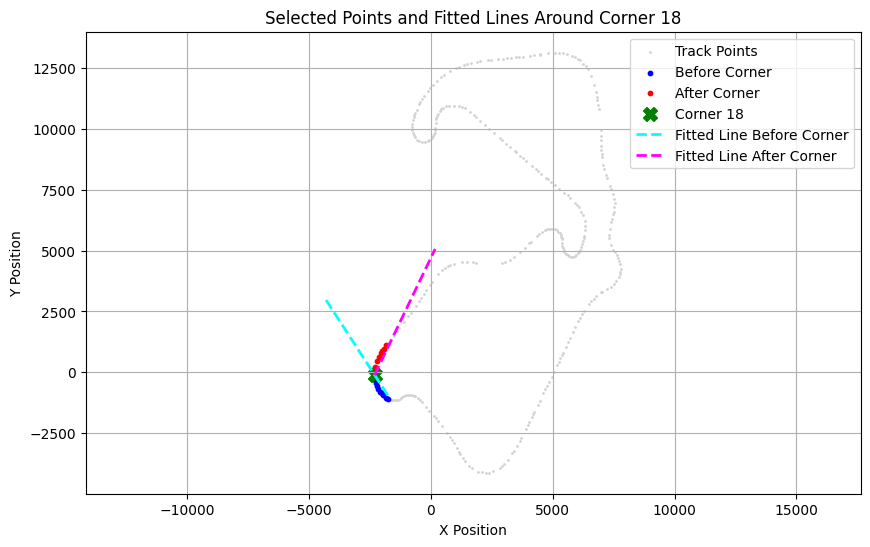

In [51]:
# Loop through each corner point in corner_df
for i, o, p in corner_df[['X', 'Y', 'Number']].itertuples(index=False):
    # Specific point through which the line should pass
    corner_x = round(i)
    corner_y = round(o)

    # Parameters
    max_value = 10
    longer_line = 2000

    # Get the closest points in the position data for the corner
    distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
    corner_index = np.argmin(distances)

    # Determine the range for points before and after the corner
    before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]
    after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]

    # Prepare data for linear regression
    X_before = before_points['X'].values.reshape(-1, 1)
    y_before = before_points['Y'].values
    X_after = after_points['X'].values.reshape(-1, 1)
    y_after = after_points['Y'].values

    # Adjust X values for each segment to pass through (x0, y0)
    x0, y0 = corner_x, corner_y
    adjusted_X_before = X_before - x0
    adjusted_X_after = X_after - x0

    # Fit a linear regression model to the points before and after the corner
    model_before = LinearRegression()
    model_before.fit(adjusted_X_before, y_before)
    fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

    model_after = LinearRegression()
    model_after.fit(adjusted_X_after, y_after)
    fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

    # Extend the range of x_fit_before and x_fit_after further
    x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
    x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)

    # Calculate the fitted lines with the constraint
    y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
    y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

    # Calculate the slopes and angles between the lines
    slope_before = model_before.coef_[0]
    slope_after = model_after.coef_[0]
    angle_radians = np.arctan(abs((slope_after - slope_before) / (1 + slope_before * slope_after)))
    acute_angle_degrees = np.degrees(angle_radians)
    obtuse_angle_degrees = 180 - acute_angle_degrees

    # Print the angles for the current corner
    print(f"Corner {p}: Acute Angle = {acute_angle_degrees:.2f}°, Obtuse Angle = {obtuse_angle_degrees:.2f}°")

    # Plotting the results for the current corner
    plt.figure(figsize=(10, 6))
    plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')
    plt.scatter(before_points['X'], before_points['Y'], color='blue', label='Before Corner', s=10)
    plt.scatter(after_points['X'], after_points['Y'], color='red', label='After Corner', s=10)
    plt.scatter(corner_x, corner_y, color='green', label=f'Corner {p}', s=100, marker='X')
    plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner')
    plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner')

    plt.title(f'Selected Points and Fitted Lines Around Corner {p}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.axis('equal')
    plt.legend()
    plt.grid()
    plt.show()


# Fonction

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def calculate_fitted_lines(corner_x, corner_y, pos, max_points=10, extend_length=2000):
    """
    Calculate the fitted lines before and after a specified corner point.
    
    Parameters:
    - corner_x, corner_y: Coordinates of the corner point.
    - pos: DataFrame containing X and Y coordinates of track points.
    - max_points: Number of points to use for linear regression before and after the corner.
    - extend_length: Extension length for the fitted lines.
    
    Returns:
    - x_fit_before, y_fit_before: Extended fitted line coordinates before the corner.
    - x_fit_after, y_fit_after: Extended fitted line coordinates after the corner.
    - before_points, after_points: Points used for regression before and after the corner.
    """
    # Calculate the closest point to the corner in the data
    distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
    corner_index = np.argmin(distances)

    # Get points before and after the corner
    before_points = pos.iloc[max(corner_index - max_points, 0):corner_index]
    after_points = pos.iloc[corner_index + 1:corner_index + max_points + 1]

    # Prepare data for linear regression
    X_before = before_points['X'].values.reshape(-1, 1)
    y_before = before_points['Y'].values
    X_after = after_points['X'].values.reshape(-1, 1)
    y_after = after_points['Y'].values

    # Adjust X values for each segment to pass through (x0, y0)
    x0, y0 = corner_x, corner_y
    adjusted_X_before = X_before - x0
    adjusted_X_after = X_after - x0

    # Fit a linear regression model for points before and after the corner
    model_before = LinearRegression()
    model_before.fit(adjusted_X_before, y_before)
    fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

    model_after = LinearRegression()
    model_after.fit(adjusted_X_after, y_after)
    fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

    # Extend the fitted lines
    x_fit_before = np.linspace(X_before.min() - extend_length, X_before.max(), 100).reshape(-1, 1)
    x_fit_after = np.linspace(X_after.min(), X_after.max() + extend_length, 100).reshape(-1, 1)

    y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
    y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

    return x_fit_before, y_fit_before, x_fit_after, y_fit_after, before_points, after_points

def plot_corner_with_fitted_lines(pos, corner_x, corner_y, corner_number, x_fit_before, y_fit_before, x_fit_after, y_fit_after, before_points, after_points, show_points=False):
    """
    Plots a specific corner with fitted lines before and after, optionally displaying the points used to fit the lines.
    
    Parameters:
    - pos: DataFrame containing track positions with columns 'X' and 'Y'.
    - corner_x, corner_y: Coordinates of the corner.
    - corner_number: Number or identifier of the corner.
    - x_fit_before, y_fit_before: Arrays for the fitted line before the corner.
    - x_fit_after, y_fit_after: Arrays for the fitted line after the corner.
    - before_points, after_points: DataFrames of points used for the fitting.
    - show_points: Boolean flag to display the points used for fitting the lines.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')
    plt.scatter(corner_x, corner_y, color='green', label=f'Corner {corner_number}', s=100, marker='X')
    plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner')
    plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner')

    # Show the points used for fitting if show_points is True
    if show_points:
        plt.scatter(before_points['X'], before_points['Y'], color='blue', label='Points Before Corner', s=10)
        plt.scatter(after_points['X'], after_points['Y'], color='red', label='Points After Corner', s=10)

    plt.title(f'Selected Points and Fitted Lines Around Corner {corner_number}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.axis('equal')
    plt.legend()
    plt.grid()
    plt.show()

def calculate_angle_between_lines(x_fit_before, y_fit_before, x_fit_after, y_fit_after):
    """
    Calculate the acute and obtuse angles between two lines defined by the points in x_fit_before/y_fit_before
    and x_fit_after/y_fit_after.

    Args:
        x_fit_before (np.array): X-coordinates of the fitted line segment before the corner.
        y_fit_before (np.array): Y-coordinates of the fitted line segment before the corner.
        x_fit_after (np.array): X-coordinates of the fitted line segment after the corner.
        y_fit_after (np.array): Y-coordinates of the fitted line segment after the corner.

    Returns:
        tuple: Acute angle in degrees, Obtuse angle in degrees.
    """
    # Ensure the input arrays are 1D
    if x_fit_before.ndim > 1:
        x_fit_before = x_fit_before.flatten()
    if y_fit_before.ndim > 1:
        y_fit_before = y_fit_before.flatten()
    if x_fit_after.ndim > 1:
        x_fit_after = x_fit_after.flatten()
    if y_fit_after.ndim > 1:
        y_fit_after = y_fit_after.flatten()

    # Check if there are enough points to calculate vectors
    if len(x_fit_before) < 2 or len(x_fit_after) < 2:
        raise ValueError("Not enough points to calculate angles.")

    # Get the direction vectors for each fitted line
    vector_before = np.array([x_fit_before[-1] - x_fit_before[0], y_fit_before[-1] - y_fit_before[0]])
    vector_after = np.array([x_fit_after[-1] - x_fit_after[0], y_fit_after[-1] - y_fit_after[0]])

    # Normalize the vectors
    norm_before = np.linalg.norm(vector_before)
    norm_after = np.linalg.norm(vector_after)

    if norm_before == 0 or norm_after == 0:
        raise ValueError("Zero-length vector detected. Cannot compute angle.")

    unit_vector_before = vector_before / norm_before
    unit_vector_after = vector_after / norm_after

    # Calculate the cosine of the angle using the dot product of the unit vectors
    cosine_angle = np.clip(np.dot(unit_vector_before, unit_vector_after), -1.0, 1.0)

    # Calculate the acute angle in radians and convert to degrees
    angle_radians = np.arccos(cosine_angle)
    acute_angle_degrees = np.degrees(angle_radians)

    # Calculate the obtuse angle
    obtuse_angle_degrees = 180 - acute_angle_degrees

    return round(acute_angle_degrees, 2), round(obtuse_angle_degrees, 2)



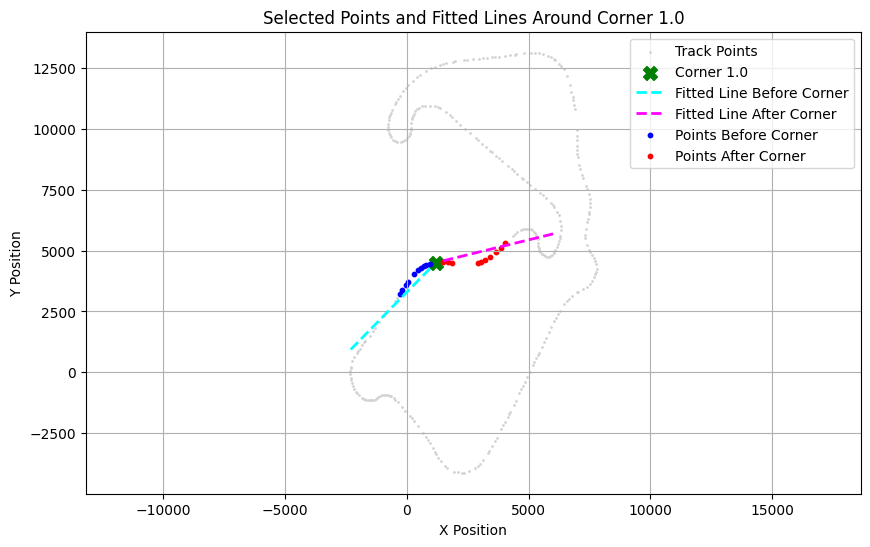

(31.88, 148.12)

In [53]:
# Example usage
corner_x, corner_y = round(corner_df.iloc[0]['X']), round(corner_df.iloc[0]['Y'])
corner_number = corner_df.iloc[0]['Number']

# Calculate fitted lines for the corner with adjustable points for fitting
x_fit_before, y_fit_before, x_fit_after, y_fit_after, before_points, after_points = calculate_fitted_lines(corner_x, corner_y,pos)

# Plot the corner with fitted lines, showing the points used for fitting
plot_corner_with_fitted_lines(pos, corner_x, corner_y, corner_number, x_fit_before, y_fit_before, x_fit_after, y_fit_after, before_points, after_points, show_points=True)

calculate_angle_between_lines(x_fit_before, y_fit_before, x_fit_after, y_fit_after)


# Test

Corner 1: Acute Angle = 31.88°, Obtuse Angle = 148.12°
Corner 2: Acute Angle = 25.15°, Obtuse Angle = 154.85°
Corner 3: Acute Angle = 86.39°, Obtuse Angle = 93.61°
Corner 4: Acute Angle = 55.50°, Obtuse Angle = 124.50°
Corner 5: Acute Angle = 61.84°, Obtuse Angle = 118.16°
Corner 6: Acute Angle = 82.67°, Obtuse Angle = 97.33°
Corner 7: Acute Angle = 27.12°, Obtuse Angle = 152.88°
Corner 8: Acute Angle = 38.52°, Obtuse Angle = 141.48°
Corner 9: Acute Angle = 66.60°, Obtuse Angle = 113.40°
Corner 10: Acute Angle = 25.86°, Obtuse Angle = 154.14°
Corner 11: Acute Angle = 30.45°, Obtuse Angle = 149.55°
Corner 12: Acute Angle = 29.96°, Obtuse Angle = 150.04°
Corner 13: Acute Angle = 71.85°, Obtuse Angle = 108.15°
Corner 14: Acute Angle = 11.84°, Obtuse Angle = 168.16°
Corner 15: Acute Angle = 88.03°, Obtuse Angle = 91.97°
Corner 16: Acute Angle = 65.06°, Obtuse Angle = 114.94°
Corner 17: Acute Angle = 57.89°, Obtuse Angle = 122.11°
Corner 18: Acute Angle = 58.61°, Obtuse Angle = 121.39°


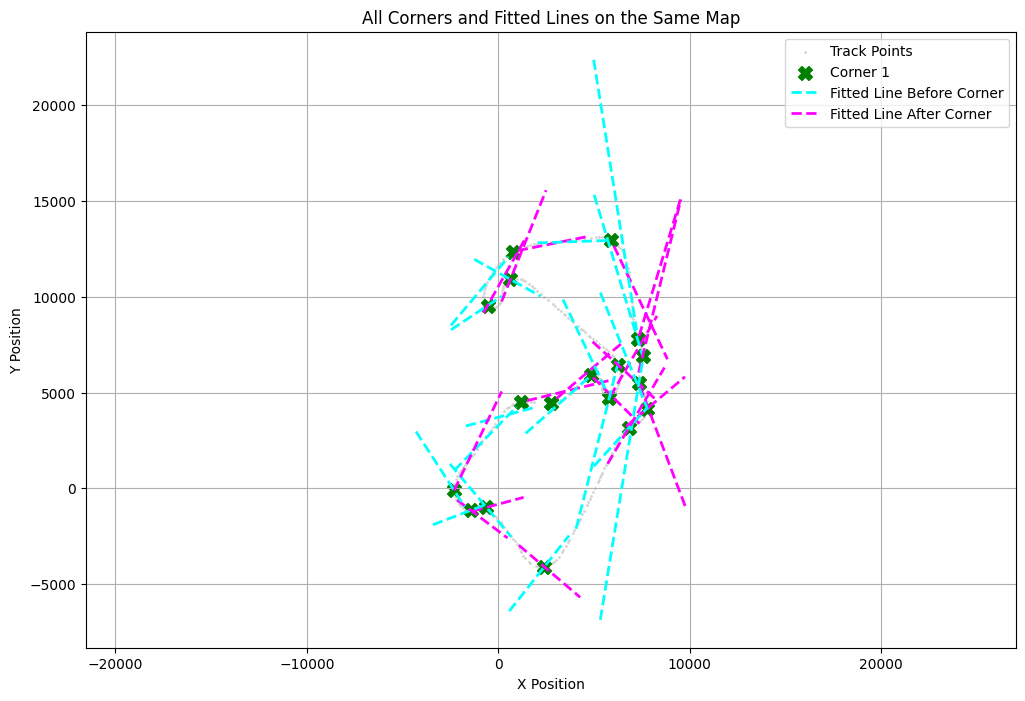

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a new plot for all corners
plt.figure(figsize=(12, 8))
plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')  # All track points

# Loop through each corner point in corner_df
for i, o, p in corner_df[['X', 'Y', 'Number']].itertuples(index=False):
    # Specific point through which the line should pass
    corner_x = round(i)
    corner_y = round(o)

    # Parameters
    max_value = 10
    longer_line = 2000

    # Get the closest points in the position data for the corner
    distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
    corner_index = np.argmin(distances)

    # Determine the range for points before and after the corner
    before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]
    after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]

    # Prepare data for linear regression
    X_before = before_points['X'].values.reshape(-1, 1)
    y_before = before_points['Y'].values
    X_after = after_points['X'].values.reshape(-1, 1)
    y_after = after_points['Y'].values

    # Adjust X values for each segment to pass through (x0, y0)
    x0, y0 = corner_x, corner_y
    adjusted_X_before = X_before - x0
    adjusted_X_after = X_after - x0

    # Fit a linear regression model to the points before and after the corner
    model_before = LinearRegression()
    model_before.fit(adjusted_X_before, y_before)
    fitted_Y_before = model_before.coef_[0] * (X_before - x0) + y0

    model_after = LinearRegression()
    model_after.fit(adjusted_X_after, y_after)
    fitted_Y_after = model_after.coef_[0] * (X_after - x0) + y0

    # Extend the range of x_fit_before and x_fit_after further
    x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
    x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)

    # Calculate the fitted lines with the constraint
    y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
    y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

    # Calculate the slopes and angles between the lines
    slope_before = model_before.coef_[0]
    slope_after = model_after.coef_[0]
    angle_radians = np.arctan(abs((slope_after - slope_before) / (1 + slope_before * slope_after)))
    acute_angle_degrees = np.degrees(angle_radians)
    obtuse_angle_degrees = 180 - acute_angle_degrees

    # Print the angles for the current corner
    print(f"Corner {p}: Acute Angle = {acute_angle_degrees:.2f}°, Obtuse Angle = {obtuse_angle_degrees:.2f}°")

    # Plot points and fitted lines for the current corner
    plt.scatter(corner_x, corner_y, color='green', s=100, marker='X', label=f'Corner {p}' if p == 1 else None)
    plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner' if p == 1 else None)
    plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner' if p == 1 else None)

# Finalize the plot
plt.title('All Corners and Fitted Lines on the Same Map')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()


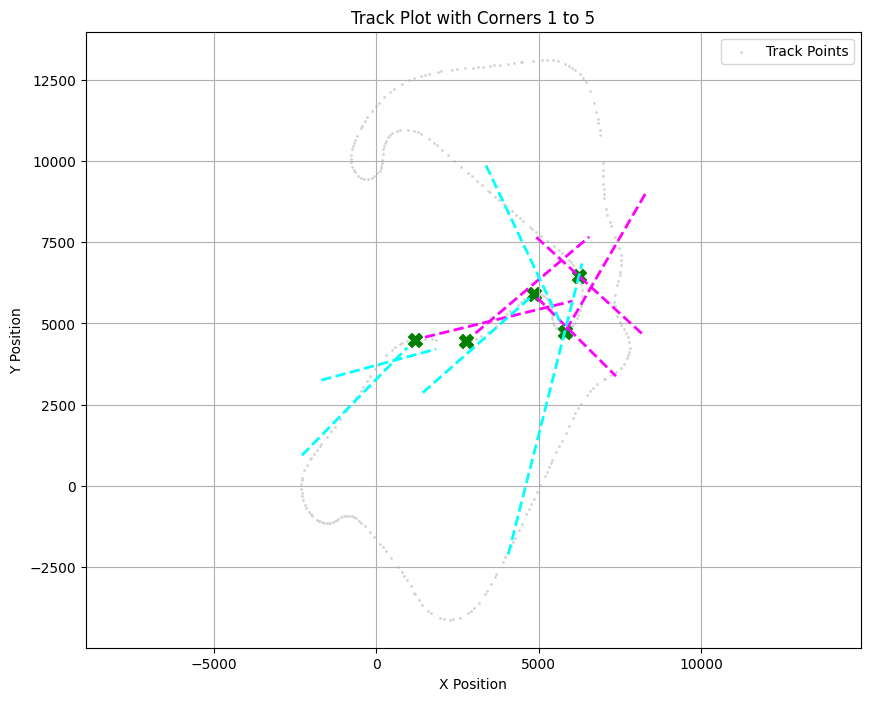

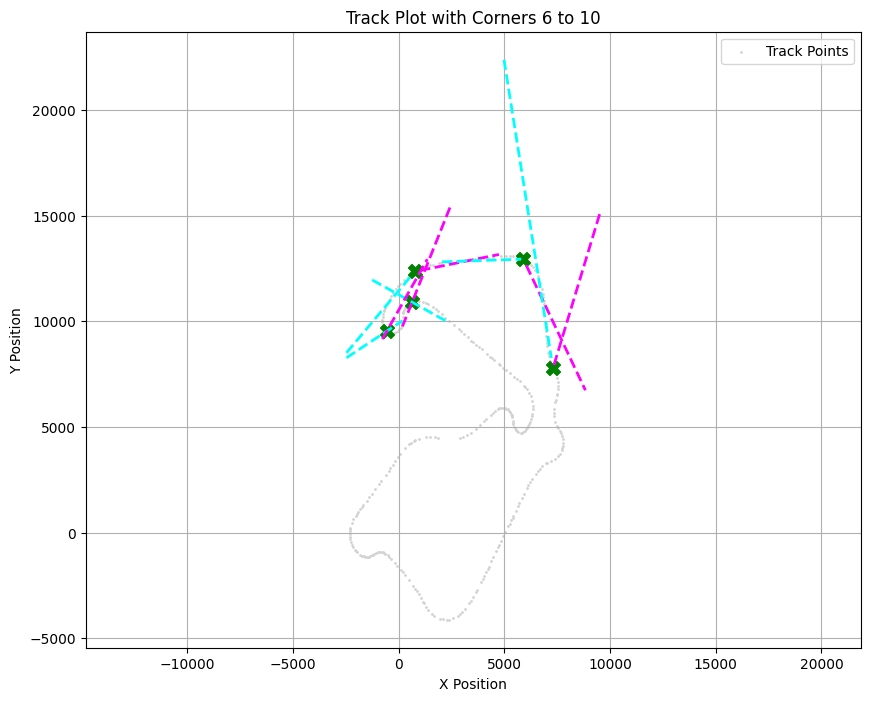

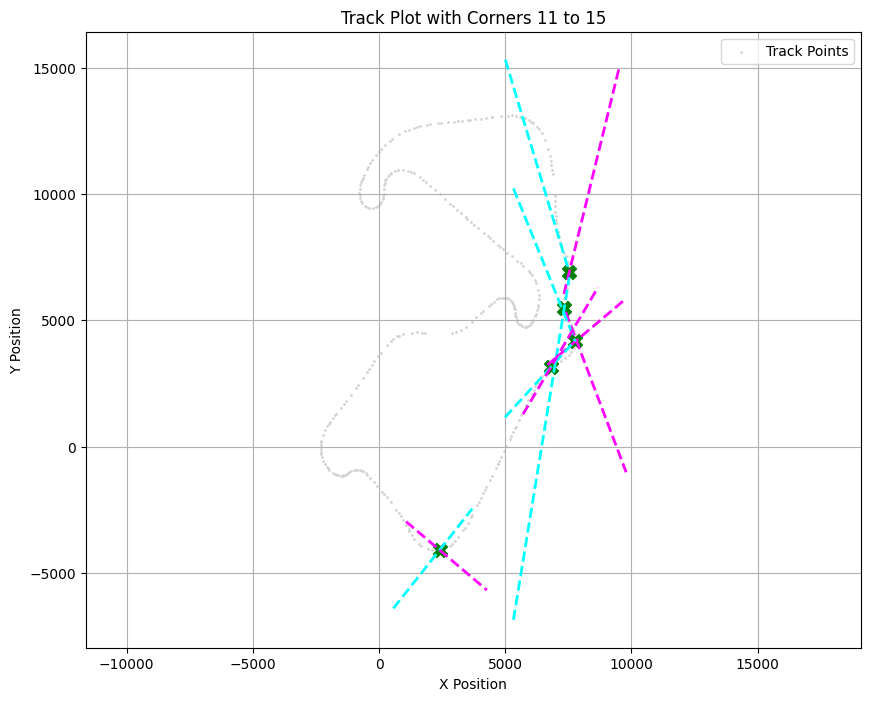

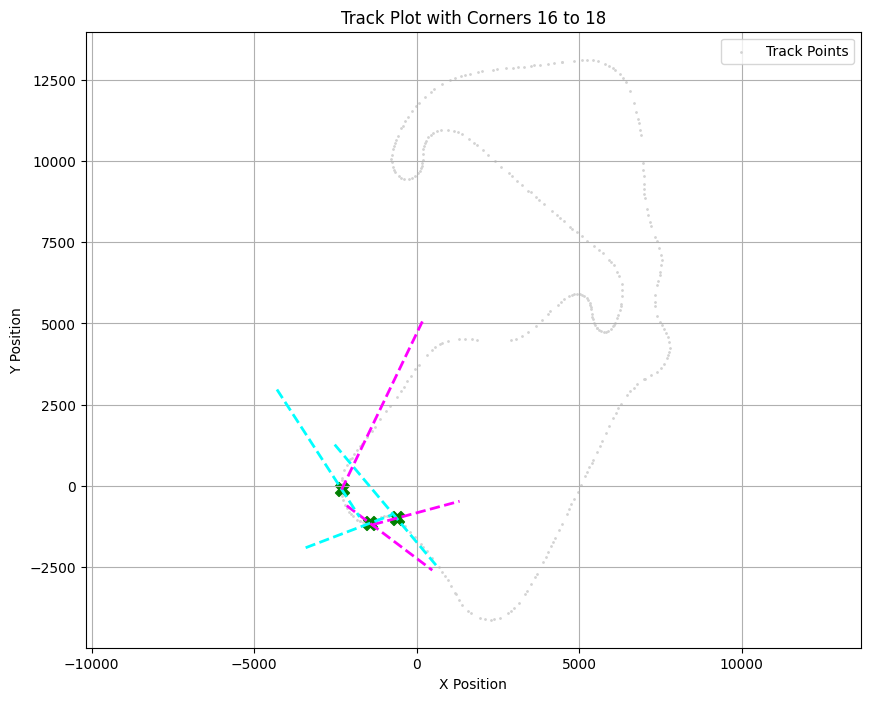

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Constants for the track limits
x_min, x_max = -3000, 1000
y_min, y_max = -5000, 15000
corners_per_plot = 5  # Number of corners per track plot

# Number of figures needed
num_figures = len(corner_df) // corners_per_plot + (len(corner_df) % corners_per_plot > 0)

# Loop over figures, plotting 5 corners in each figure
for fig_num in range(num_figures):
    plt.figure(figsize=(10, 8))
    plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')
    
    # Get the subset of corners for this plot
    start_corner = fig_num * corners_per_plot
    end_corner = min(start_corner + corners_per_plot, len(corner_df))
    corners_subset = corner_df.iloc[start_corner:end_corner]

    # Loop through each corner point in the subset
    for i, o, p in corners_subset[['X', 'Y', 'Number']].itertuples(index=False):
        corner_x, corner_y = round(i), round(o)
        
        # Number of points around each corner
        max_value = 10
        longer_line = 2000

        # Find the closest track point to this corner
        distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
        corner_index = np.argmin(distances)

        # Get points before and after the corner
        before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]
        after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]

        X_before, y_before = before_points['X'].values.reshape(-1, 1), before_points['Y'].values
        X_after, y_after = after_points['X'].values.reshape(-1, 1), after_points['Y'].values

        # Center points at (x0, y0)
        x0, y0 = corner_x, corner_y
        adjusted_X_before = X_before - x0
        adjusted_X_after = X_after - x0

        # Fit lines before and after the corner
        model_before, model_after = LinearRegression(), LinearRegression()
        model_before.fit(adjusted_X_before, y_before)
        model_after.fit(adjusted_X_after, y_after)

        # Calculate fitted lines
        x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
        x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)
        y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
        y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

        # Plot the corner and fitted lines
        plt.scatter(corner_x, corner_y, color='green', s=100, marker='X', label=f'Corner {p}' if p == start_corner else None)
        plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner' if p == start_corner else None)
        plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner' if p == start_corner else None)

    # Set plot range and labels
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f'Track Plot with Corners {start_corner + 1} to {end_corner}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.axis('equal')
    plt.legend()
    plt.grid()
    plt.show()


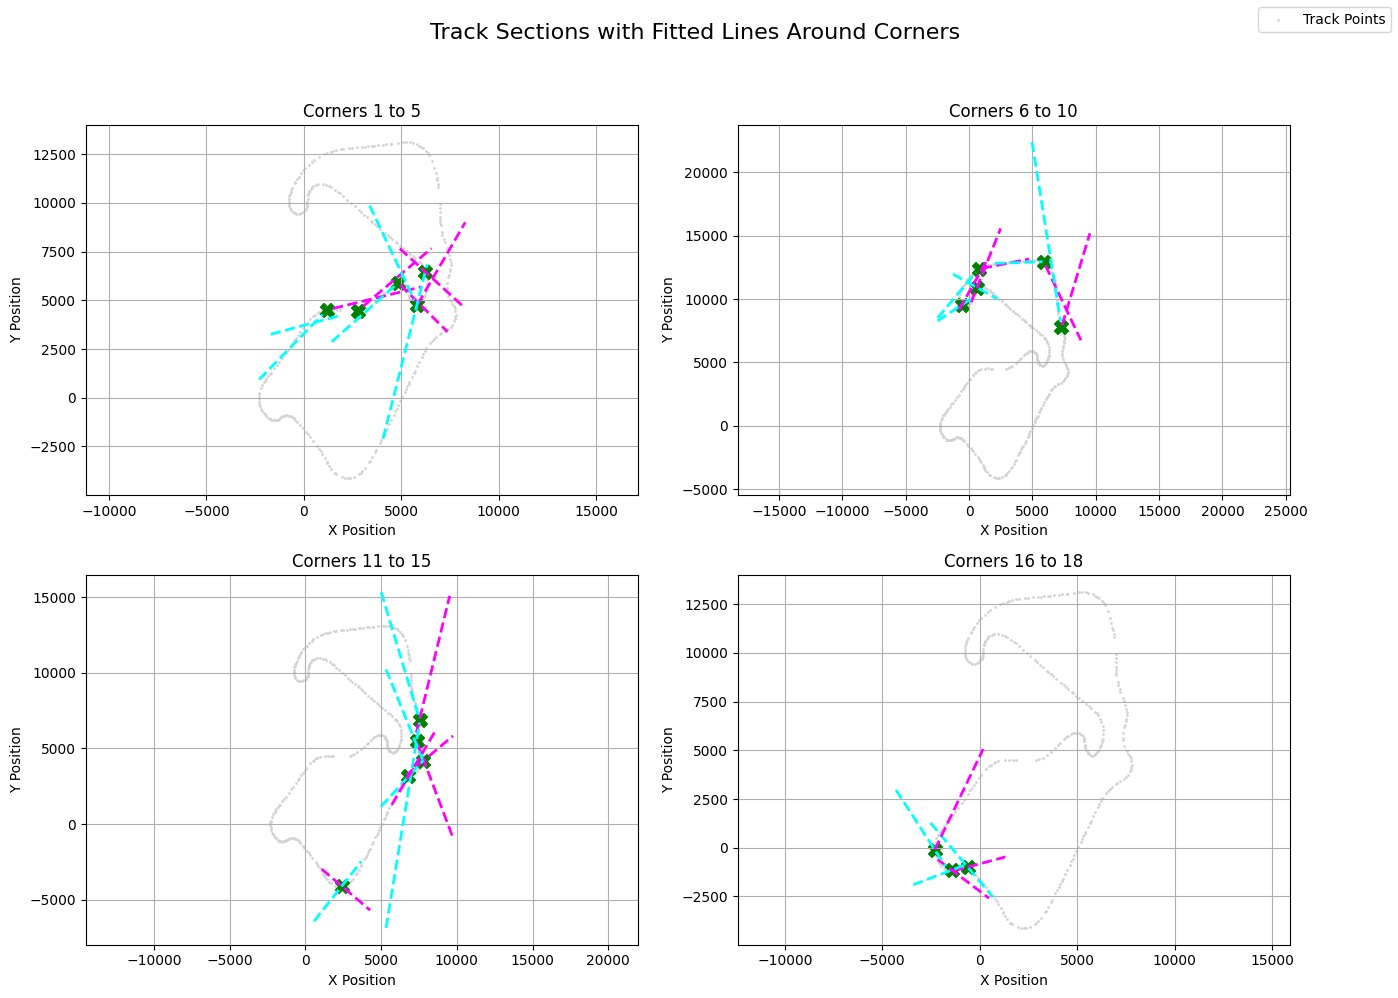

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Constants for the track limits
x_min, x_max = -3000, 1000
y_min, y_max = -5000, 15000
corners_per_plot = 5  # Number of corners per track plot

# Number of figures needed
num_figures = len(corner_df) // corners_per_plot + (len(corner_df) % corners_per_plot > 0)

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Track Sections with Fitted Lines Around Corners", fontsize=16)

# Loop over figures, plotting 5 corners in each subplot
for fig_num in range(num_figures):
    ax = axes[fig_num // 2, fig_num % 2]  # Get subplot position
    
    # Plot all track points in light gray
    ax.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')
    
    # Get the subset of corners for this plot
    start_corner = fig_num * corners_per_plot
    end_corner = min(start_corner + corners_per_plot, len(corner_df))
    corners_subset = corner_df.iloc[start_corner:end_corner]

    # Loop through each corner point in the subset
    for i, o, p in corners_subset[['X', 'Y', 'Number']].itertuples(index=False):
        corner_x, corner_y = round(i), round(o)
        
        # Number of points around each corner
        max_value = 10
        longer_line = 2000

        # Find the closest track point to this corner
        distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
        corner_index = np.argmin(distances)

        # Get points before and after the corner
        before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]
        after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]

        X_before, y_before = before_points['X'].values.reshape(-1, 1), before_points['Y'].values
        X_after, y_after = after_points['X'].values.reshape(-1, 1), after_points['Y'].values

        # Center points at (x0, y0)
        x0, y0 = corner_x, corner_y
        adjusted_X_before = X_before - x0
        adjusted_X_after = X_after - x0

        # Fit lines before and after the corner
        model_before, model_after = LinearRegression(), LinearRegression()
        model_before.fit(adjusted_X_before, y_before)
        model_after.fit(adjusted_X_after, y_after)

        # Calculate fitted lines
        x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
        x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)
        y_fit_before = model_before.coef_[0] * (x_fit_before - x0) + y0
        y_fit_after = model_after.coef_[0] * (x_fit_after - x0) + y0

        # Plot the corner and fitted lines
        ax.scatter(corner_x, corner_y, color='green', s=100, marker='X', label=f'Corner {p}' if p == start_corner else None)
        ax.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner' if p == start_corner else None)
        ax.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner' if p == start_corner else None)

    # Set plot range and labels
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'Corners {start_corner + 1} to {end_corner}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.axis('equal')
    ax.grid()

# Add legend to the first subplot only to avoid clutter
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


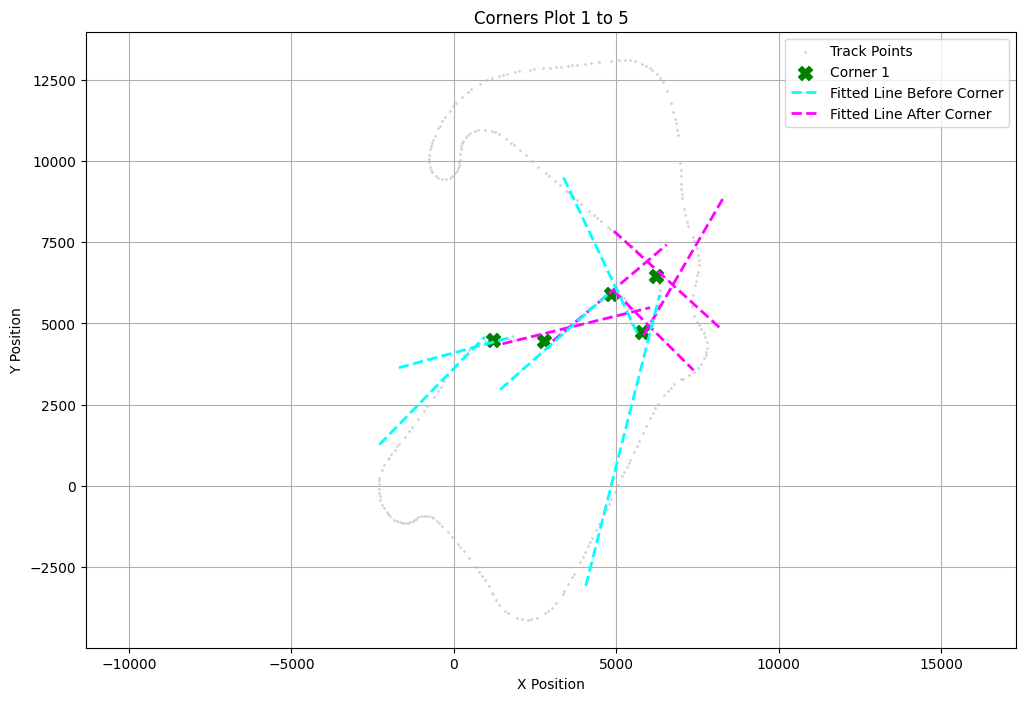

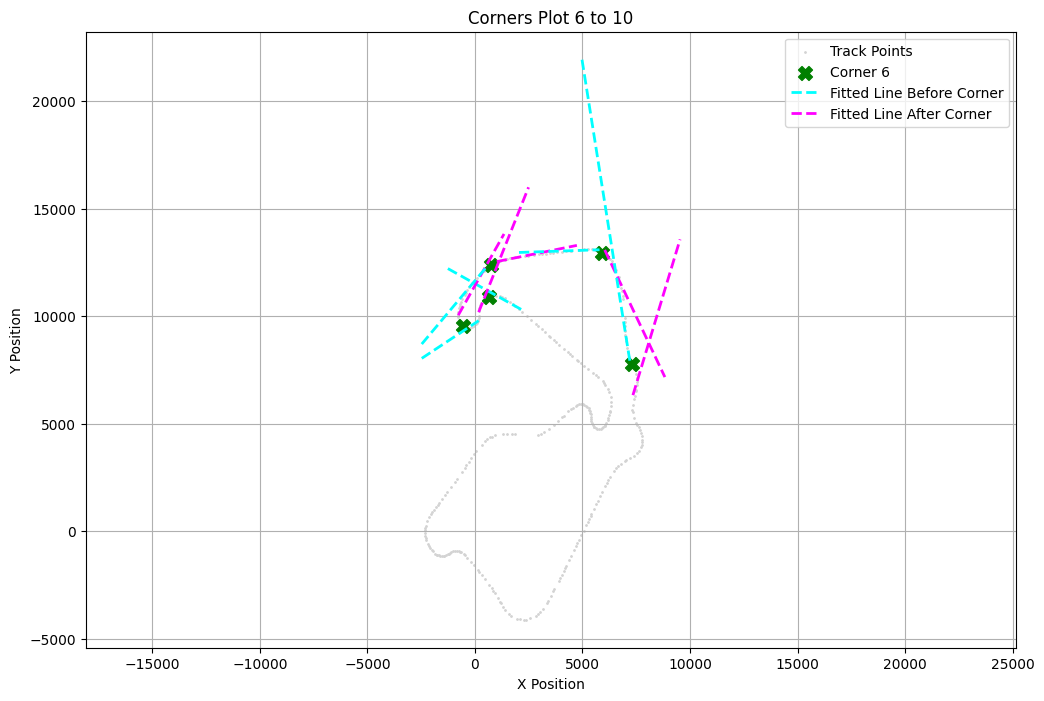

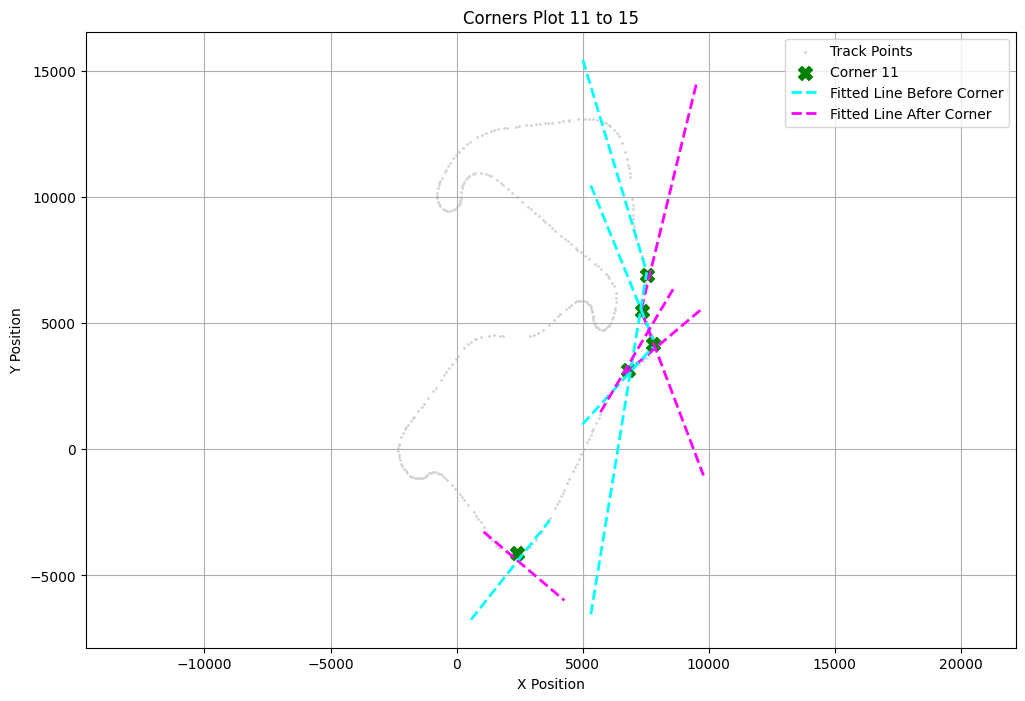

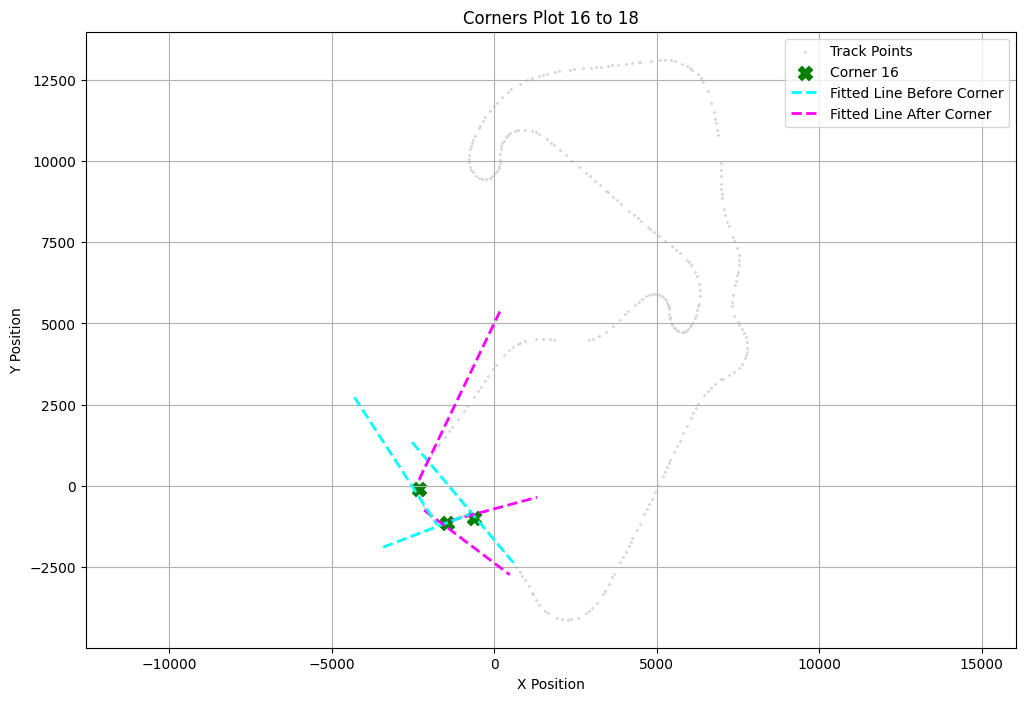

In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def plot_corners_with_fitted_lines(pos, corner_df, corners_per_plot=5, max_value=10, longer_line=2000):
    """
    Plots corners with fitted lines before and after each corner.

    Parameters:
    - pos: DataFrame containing track positions with columns 'X' and 'Y'.
    - corner_df: DataFrame containing corner data with columns 'X', 'Y', and 'Number'.
    - corners_per_plot: Number of corners to display per plot.
    - max_value: Number of points to consider before and after the corner.
    - longer_line: Length of the fitted line segments.
    """
    # Number of figures needed
    num_figures = len(corner_df) // corners_per_plot + (len(corner_df) % corners_per_plot > 0)

    # Loop over figures, plotting corners in each figure
    for fig_num in range(num_figures):
        plt.figure(figsize=(12, 8))
        plt.scatter(pos['X'], pos['Y'], color='lightgray', s=1, label='Track Points')  # All track points

        # Get the subset of corners for this plot
        start_corner = fig_num * corners_per_plot
        end_corner = min(start_corner + corners_per_plot, len(corner_df))
        corners_subset = corner_df.iloc[start_corner:end_corner]

        # Loop through each corner point in the subset
        for i, o, p in corners_subset[['X', 'Y', 'Number']].itertuples(index=False):
            corner_x = round(i)
            corner_y = round(o)

            # Get the closest points in the position data for the corner
            distances = np.sqrt((pos['X'] - corner_x) ** 2 + (pos['Y'] - corner_y) ** 2)
            corner_index = np.argmin(distances)

            # Determine the range for points before and after the corner
            before_points = pos.iloc[max(corner_index - max_value, 0):corner_index]
            after_points = pos.iloc[corner_index + 1:corner_index + max_value + 1]

            # Prepare data for linear regression
            X_before = before_points['X'].values.reshape(-1, 1)
            y_before = before_points['Y'].values
            X_after = after_points['X'].values.reshape(-1, 1)
            y_after = after_points['Y'].values

            # Create x_fit values for extending lines
            x_fit_before = np.linspace(X_before.min() - longer_line, X_before.max(), 100).reshape(-1, 1)
            x_fit_after = np.linspace(X_after.min(), X_after.max() + longer_line, 100).reshape(-1, 1)

            # Fit a linear regression model to the points before and after the corner
            model_before = LinearRegression()
            model_before.fit(X_before, y_before)

            model_after = LinearRegression()
            model_after.fit(X_after, y_after)

            # Calculate the fitted lines with the fitted models
            y_fit_before = model_before.predict(x_fit_before)
            y_fit_after = model_after.predict(x_fit_after)

            # Plot points and fitted lines for the current corner
            plt.scatter(corner_x, corner_y, color='green', s=100, marker='X', label=f'Corner {p}' if p == start_corner + 1 else None)
            plt.plot(x_fit_before, y_fit_before, color='cyan', linestyle='--', linewidth=2, label='Fitted Line Before Corner' if p == start_corner + 1 else None)
            plt.plot(x_fit_after, y_fit_after, color='magenta', linestyle='--', linewidth=2, label='Fitted Line After Corner' if p == start_corner + 1 else None)

        # Finalize the plot
        plt.title(f'Corners Plot {start_corner + 1} to {end_corner}')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.axis('equal')
        plt.legend()
        plt.grid()
        plt.show()

# Example call to the function (assuming pos and corner_df are already defined)
plot_corners_with_fitted_lines(pos, corner_df)
